In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_block_latency = pd.read_csv("baseline/block_count_latency_device.csv")
df_baseline_read_bytes = pd.read_csv("baseline/read_bytes.csv")
df_baseline_write_bytes = pd.read_csv("baseline/write_bytes.csv")

# Load CPU STRESS datasets
df_cpustress_block_latency = pd.read_csv("cpu stress/block_count_latency_device.csv")
df_cpustress_read_bytes = pd.read_csv("cpu stress/read_bytes.csv")
df_cpustress_write_bytes = pd.read_csv("cpu stress/write_bytes.csv")

# Load DELAY datasets
df_delay_block_latency = pd.read_csv("delay/block_count_latency_device.csv")
df_delay_read_bytes = pd.read_csv("delay/read_bytes.csv")
df_delay_write_bytes = pd.read_csv("delay/write_bytes.csv")

# Load MEM STRESS datasets
df_memstress_block_latency = pd.read_csv("mem stress/block_count_latency_device.csv")
df_memstress_read_bytes = pd.read_csv("mem stress/read_bytes.csv")
df_memstress_write_bytes = pd.read_csv("mem stress/write_bytes.csv")

# Load NET LOSS datasets
df_netloss_block_latency = pd.read_csv("netloss/block_count_latency_device.csv")
df_netloss_read_bytes = pd.read_csv("netloss/read_bytes.csv")
df_netloss_write_bytes = pd.read_csv("netloss/write_bytes.csv")


# Add source labels - BASELINE
df_baseline_block_latency["source"] = "BASELINE"
df_baseline_read_bytes["source"] = "BASELINE"
df_baseline_write_bytes["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_block_latency["source"] = "CPU_STRESS"
df_cpustress_read_bytes["source"] = "CPU_STRESS"
df_cpustress_write_bytes["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_delay_block_latency["source"] = "DELAY"
df_delay_read_bytes["source"] = "DELAY"
df_delay_write_bytes["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_block_latency["source"] = "MEM_STRESS"
df_memstress_read_bytes["source"] = "MEM_STRESS"
df_memstress_write_bytes["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_block_latency["source"] = "NET_LOSS"
df_netloss_read_bytes["source"] = "NET_LOSS"
df_netloss_write_bytes["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_block_latency["Time"] = pd.to_datetime(df_baseline_block_latency["Time"])
df_baseline_read_bytes["Time"] = pd.to_datetime(df_baseline_read_bytes["Time"])
df_baseline_write_bytes["Time"] = pd.to_datetime(df_baseline_write_bytes["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_block_latency["Time"] = pd.to_datetime(df_cpustress_block_latency["Time"])
df_cpustress_read_bytes["Time"] = pd.to_datetime(df_cpustress_read_bytes["Time"])
df_cpustress_write_bytes["Time"] = pd.to_datetime(df_cpustress_write_bytes["Time"])

# Convert to datetime - DELAY
df_delay_block_latency["Time"] = pd.to_datetime(df_delay_block_latency["Time"])
df_delay_read_bytes["Time"] = pd.to_datetime(df_delay_read_bytes["Time"])
df_delay_write_bytes["Time"] = pd.to_datetime(df_delay_write_bytes["Time"])

# Convert to datetime - MEM STRESS
df_memstress_block_latency["Time"] = pd.to_datetime(df_memstress_block_latency["Time"])
df_memstress_read_bytes["Time"] = pd.to_datetime(df_memstress_read_bytes["Time"])
df_memstress_write_bytes["Time"] = pd.to_datetime(df_memstress_write_bytes["Time"])

# Convert to datetime - NET LOSS
df_netloss_block_latency["Time"] = pd.to_datetime(df_netloss_block_latency["Time"])
df_netloss_read_bytes["Time"] = pd.to_datetime(df_netloss_read_bytes["Time"])
df_netloss_write_bytes["Time"] = pd.to_datetime(df_netloss_write_bytes["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_block_latency["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_block_latency["Time"].min()
df_cpustress_block_latency["Time"] += cpustress_offset
df_cpustress_read_bytes["Time"] += cpustress_offset
df_cpustress_write_bytes["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_delay_block_latency["Time"].min()
df_delay_block_latency["Time"] += delay_offset
df_delay_read_bytes["Time"] += delay_offset
df_delay_write_bytes["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_block_latency["Time"].min()
df_memstress_block_latency["Time"] += memstress_offset
df_memstress_read_bytes["Time"] += memstress_offset
df_memstress_write_bytes["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_block_latency["Time"].min()
df_netloss_block_latency["Time"] += netloss_offset
df_netloss_read_bytes["Time"] += netloss_offset
df_netloss_write_bytes["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_block_latency, df_baseline_read_bytes, df_baseline_write_bytes,
    # CPU Stress
    df_cpustress_block_latency, df_cpustress_read_bytes, df_cpustress_write_bytes,
    # Delay
    df_delay_block_latency, df_delay_read_bytes, df_delay_write_bytes,
    # Memory Stress
    df_memstress_block_latency, df_memstress_read_bytes, df_memstress_write_bytes,
    # Network Loss
    df_netloss_block_latency, df_netloss_read_bytes, df_netloss_write_bytes
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'BlockLatency': {
        'baseline': df_baseline_block_latency,
        'cpu_stress': df_cpustress_block_latency,
        'delay': df_delay_block_latency,
        'mem_stress': df_memstress_block_latency,
        'net_loss': df_netloss_block_latency,
    },
    'ReadBytes': {
        'baseline': df_baseline_read_bytes,
        'cpu_stress': df_cpustress_read_bytes,
        'delay': df_delay_read_bytes,
        'mem_stress': df_memstress_read_bytes,
        'net_loss': df_netloss_read_bytes,
    },
    'WriteBytes': {
        'baseline': df_baseline_write_bytes,
        'cpu_stress': df_cpustress_write_bytes,
        'delay': df_delay_write_bytes,
        'mem_stress': df_memstress_write_bytes,
        'net_loss': df_netloss_write_bytes,
    }
}

print("✅ All I/O datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} I/O metrics across {len(all_datasets['BlockLatency'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All I/O datasets loaded successfully!
📊 Loaded 3 I/O metrics across 5 experiment types

Dataset structure:
  BlockLatency: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  ReadBytes: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  WriteBytes: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


  Skipped ML enhancement for BlockLatency - baseline (discrete data: 3 unique values)
  Skipped ML enhancement for BlockLatency - cpu_stress (discrete data: 2 unique values)
  Skipped ML enhancement for BlockLatency - delay (discrete data: 3 unique values)
  Skipped ML enhancement for BlockLatency - mem_stress (discrete data: 2 unique values)
  Skipped ML enhancement for BlockLatency - net_loss (discrete data: 3 unique values)
Processing ReadBytes
Training ReadBytes...
  Skipped ML enhancement for ReadBytes - baseline (discrete data: 1 unique values)
  Applied ML enhancement for ReadBytes - cpu_stress
  Skipped ML enhancement for ReadBytes - delay (discrete data: 1 unique values)
  Applied ML enhancement for ReadBytes - mem_stress
  Applied ML enhancement for ReadBytes - net_loss
Processing WriteBytes
Training WriteBytes...
  Applied ML enhancement for WriteBytes - baseline
  Applied ML enhancement for WriteBytes - cpu_stress
  Applied ML enhancement for WriteBytes - delay
  Applied ML

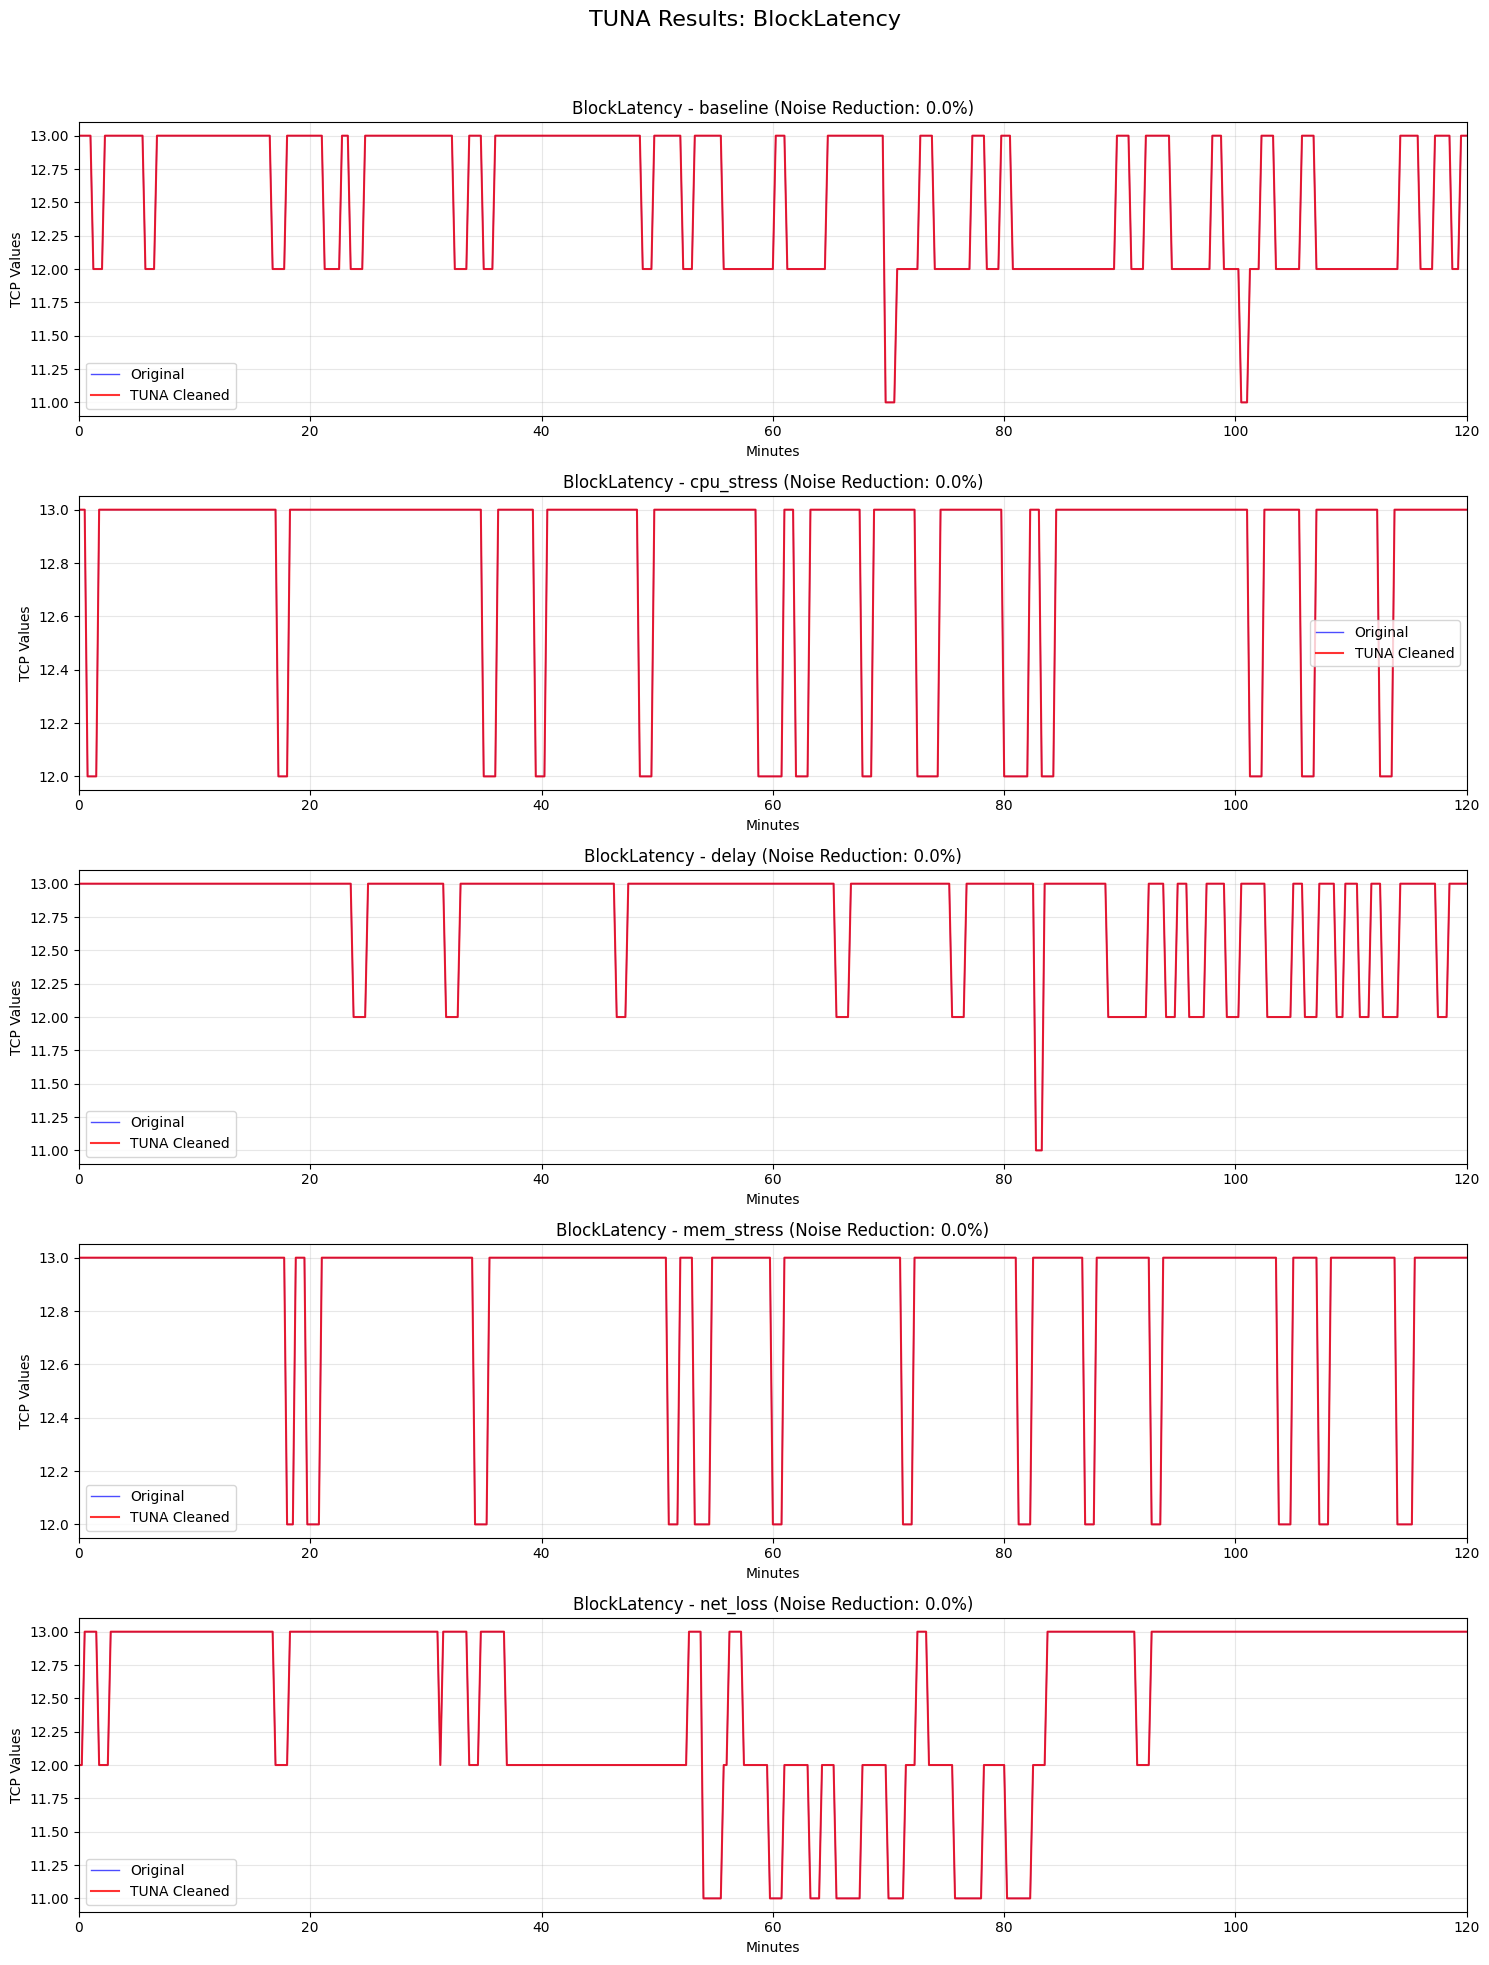

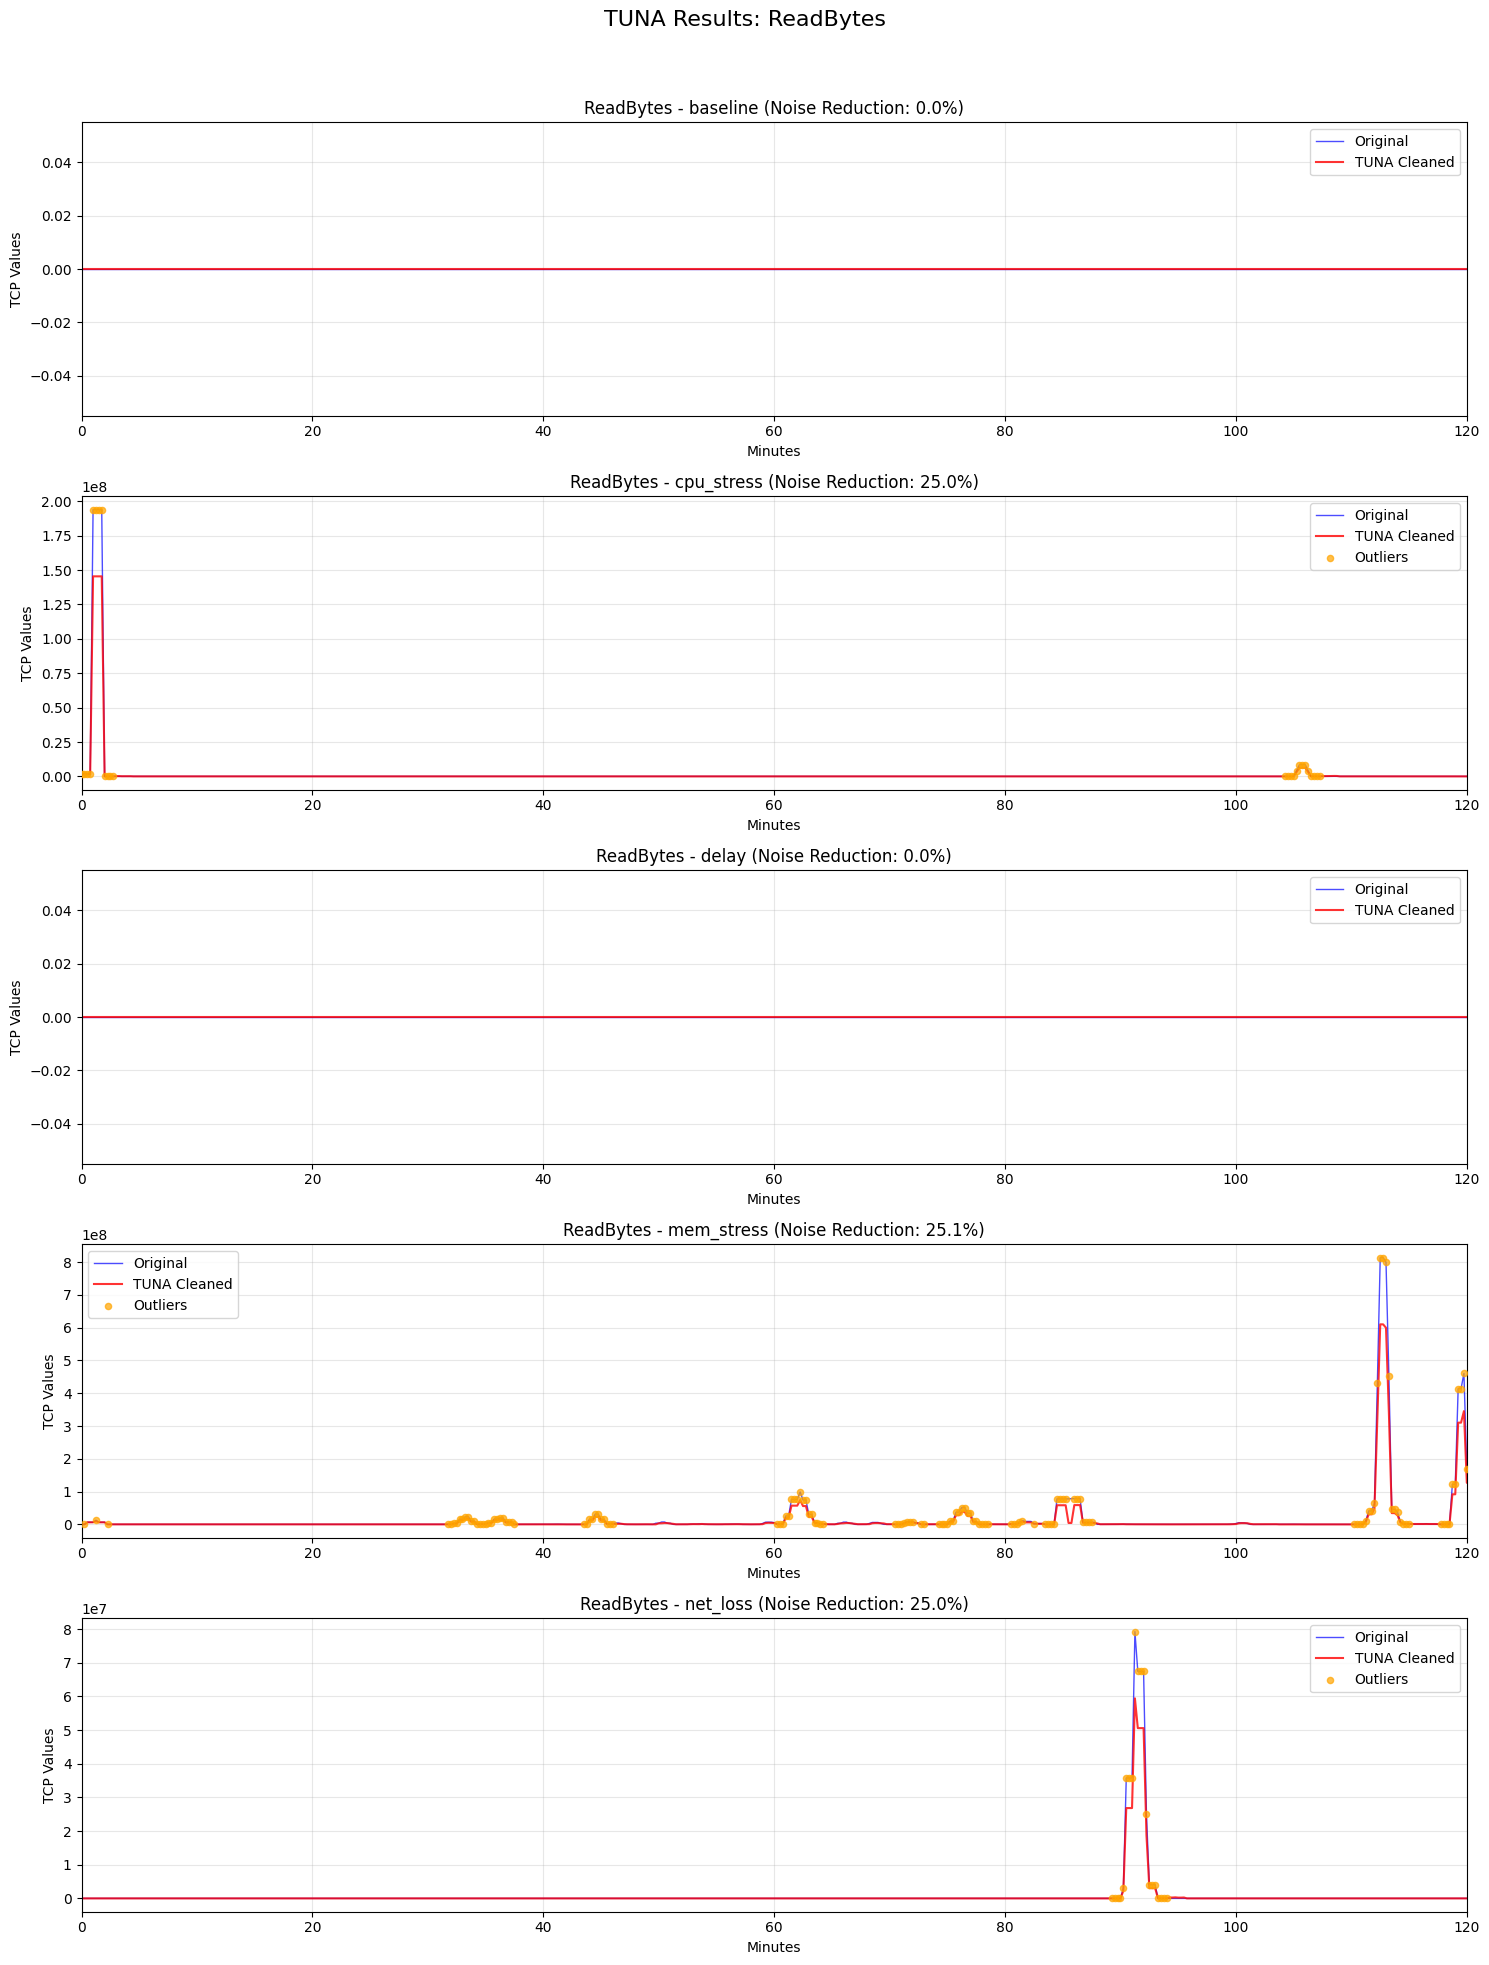

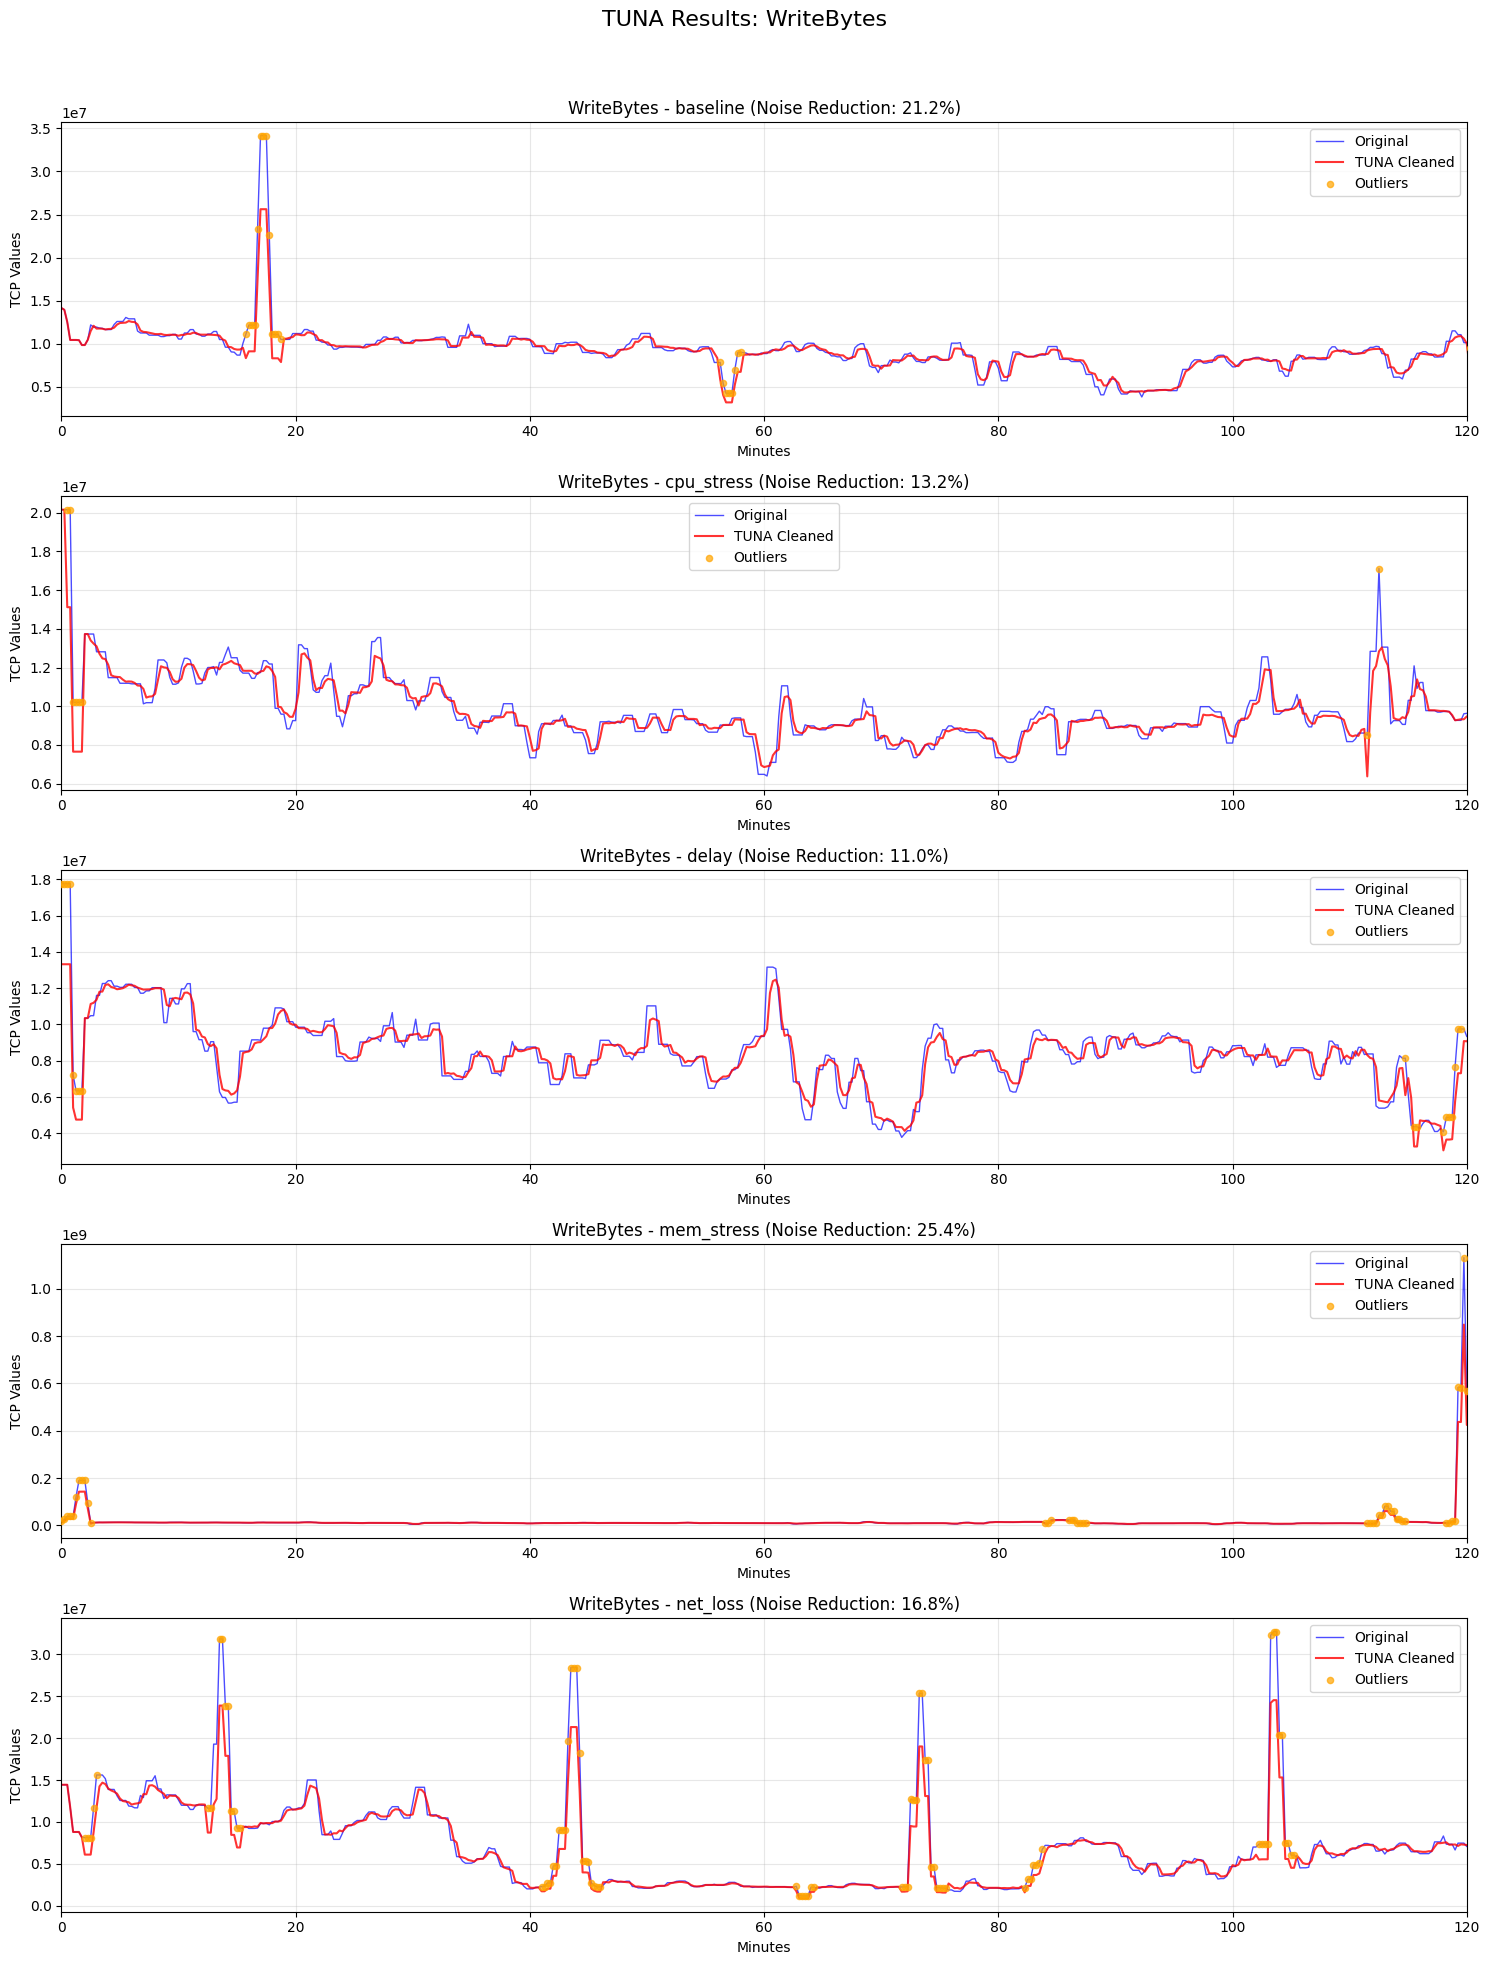


Disk I/O TUNA Results Summary:
Metric          Experiment   Outliers   Gap-Filled  Noise Red%   Correlation 
----------------------------------------------------------------------
BlockLatency    baseline     0          0                  0.0%       1.000
BlockLatency    cpu_stress   0          0                  0.0%       1.000
BlockLatency    delay        0          0                  0.0%       1.000
BlockLatency    mem_stress   0          0                  0.0%       1.000
BlockLatency    net_loss     0          0                  0.0%       1.000
ReadBytes       baseline     0          0                  0.0%         nan
ReadBytes       cpu_stress   25         0                 25.0%       1.000
ReadBytes       delay        0          0                  0.0%         nan
ReadBytes       mem_stress   136        2                 25.1%       0.998
ReadBytes       net_loss     20         0                 25.0%       1.000
WriteBytes      baseline     24         2                 2

In [11]:
def extract_disk_values(df, metric_name):
    """Extract disk values - single column for DiskUtil, sum for ReadBytes/WriteBytes"""
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if metric_name == 'DiskUtil':
        # For disk utilization, we typically have a single disk column
        if len(value_cols) == 1:
            return df[value_cols[0]].values
        else:
            # If multiple disks, take the primary one or sum (depending on use case)
            return df[value_cols[0]].values  # Take first disk as primary
    else:
        # For ReadBytes/WriteBytes, sum across all partitions/devices
        return df[value_cols].sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=5, threshold=0.65, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark only the max/min values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                window_max = np.max(window)
                window_min = np.min(window)
                
                # Mark extreme values within unstable window
                for j in range(window_size):
                    actual_idx = i + j
                    if (timeseries[actual_idx] == window_max or 
                        timeseries[actual_idx] == window_min):
                        outlier_mask[actual_idx] = True
    
    return outlier_mask

def extend_outlier_sequences(outlier_mask, max_gap=2):
    """Fill short gaps between outliers to prevent W-shapes"""
    extended_mask = outlier_mask.copy()
    
    for i in range(len(outlier_mask) - max_gap - 1):
        if outlier_mask[i]:  # Found outlier
            # Look ahead for next outlier within max_gap
            for gap in range(1, max_gap + 1):
                if i + gap < len(outlier_mask) and outlier_mask[i + gap]:
                    # Fill the gap
                    extended_mask[i:i+gap+1] = True
                    break
    
    return extended_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        disk_values = extract_disk_values(df, metric_name)
        outlier_mask = detect_outliers_tuna(disk_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(disk_values, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = disk_values[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.5):
    """Apply penalty to outliers by reducing their values"""
    cleaned_series = timeseries.copy()
    
    for i in range(len(timeseries)):
        if outlier_mask[i]:
            cleaned_series[i] = timeseries[i] * 0.75
    
    return cleaned_series

def apply_tuna_to_single_series(disk_values, exp_name, model, scaler, penalty_factor=0.5, blend_weight=1.0, metric_name=""):
    """Apply TUNA cleaning with gap filling"""
    
    # Phase 1: Identify unstable measurements and extend sequences
    initial_outlier_mask = detect_outliers_tuna(disk_values)
    outlier_mask = extend_outlier_sequences(initial_outlier_mask, max_gap=2)
    stable_mask = ~outlier_mask
    
    outliers_count = np.sum(outlier_mask)
    added_outliers = np.sum(outlier_mask) - np.sum(initial_outlier_mask)
    
    # Phase 2: Apply penalty to unstable measurements (including gap-filled)
    cleaned_series = apply_penalty(disk_values, outlier_mask, penalty_factor)
    
    # Phase 3: Smart ML application based on data characteristics
    unique_values = len(np.unique(disk_values))
    data_range = np.max(disk_values) - np.min(disk_values)
    
    # Check if data is too discrete/limited for ML enhancement
    is_discrete_limited = unique_values <= 5 and data_range <= 5
    
    if model is not None and scaler is not None and not is_discrete_limited:
        # Apply ML for continuous/high-variance data
        features = create_features_for_ml(disk_values, exp_name)
        features_scaled = scaler.transform(features)
        ml_predictions = model.predict(features_scaled)
        
        # Replace stable periods with ML predictions
        for i, prediction in enumerate(ml_predictions):
            actual_idx = i + 10  # Account for feature window offset
            if actual_idx < len(cleaned_series) and stable_mask[actual_idx]:
                cleaned_series[actual_idx] = prediction
        
        print(f"  Applied ML enhancement for {metric_name} - {exp_name}")
    else:
        # For discrete/limited data, keep penalty-only approach
        print(f"  Skipped ML enhancement for {metric_name} - {exp_name} (discrete data: {unique_values} unique values)")
    
    # Compute improvement metrics
    original_std = np.std(disk_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(disk_values, cleaned_series)[0, 1] if len(disk_values) > 1 else 1.0
    
    return cleaned_series, outlier_mask, {
        'outliers': outliers_count,
        'noise_reduction': noise_reduction,
        'correlation': correlation,
        'gap_filled': added_outliers
    }

def run_tuna_for_all_metrics():
    """Run TUNA for all disk metrics"""
    print("Running TUNA analysis on disk I/O datasets...")
    
    tuna_results = {}
    
    # Process each disk metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            disk_values = extract_disk_values(df, metric_name)
            
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                disk_values, exp_name, model, scaler, metric_name=metric_name
            )
            
            metric_results[exp_name] = {
                'original': disk_values,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Get the corresponding dataframe to extract Minutes column
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # Plot time series with cleaning overlay using Minutes as x-axis
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Set appropriate y-axis label based on metric
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120) 
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16, y=0.98)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nDisk I/O TUNA Results Summary:")
    print("="*70)
    print(f"{'Metric':<15} {'Experiment':<12} {'Outliers':<10} {'Gap-Filled':<11} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*70)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            gap_filled = stats.get('gap_filled', 0)
            print(f"{metric_name:<15} {exp_name:<12} {stats['outliers']:<10} {gap_filled:<11} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)


COMPREHENSIVE DISK I/O ANALYSIS
Each disk metric will be compared to its own baseline

🔍 Analyzing BlockLatency...

📊 Comparing BlockLatency: cpu_stress stress vs baseline


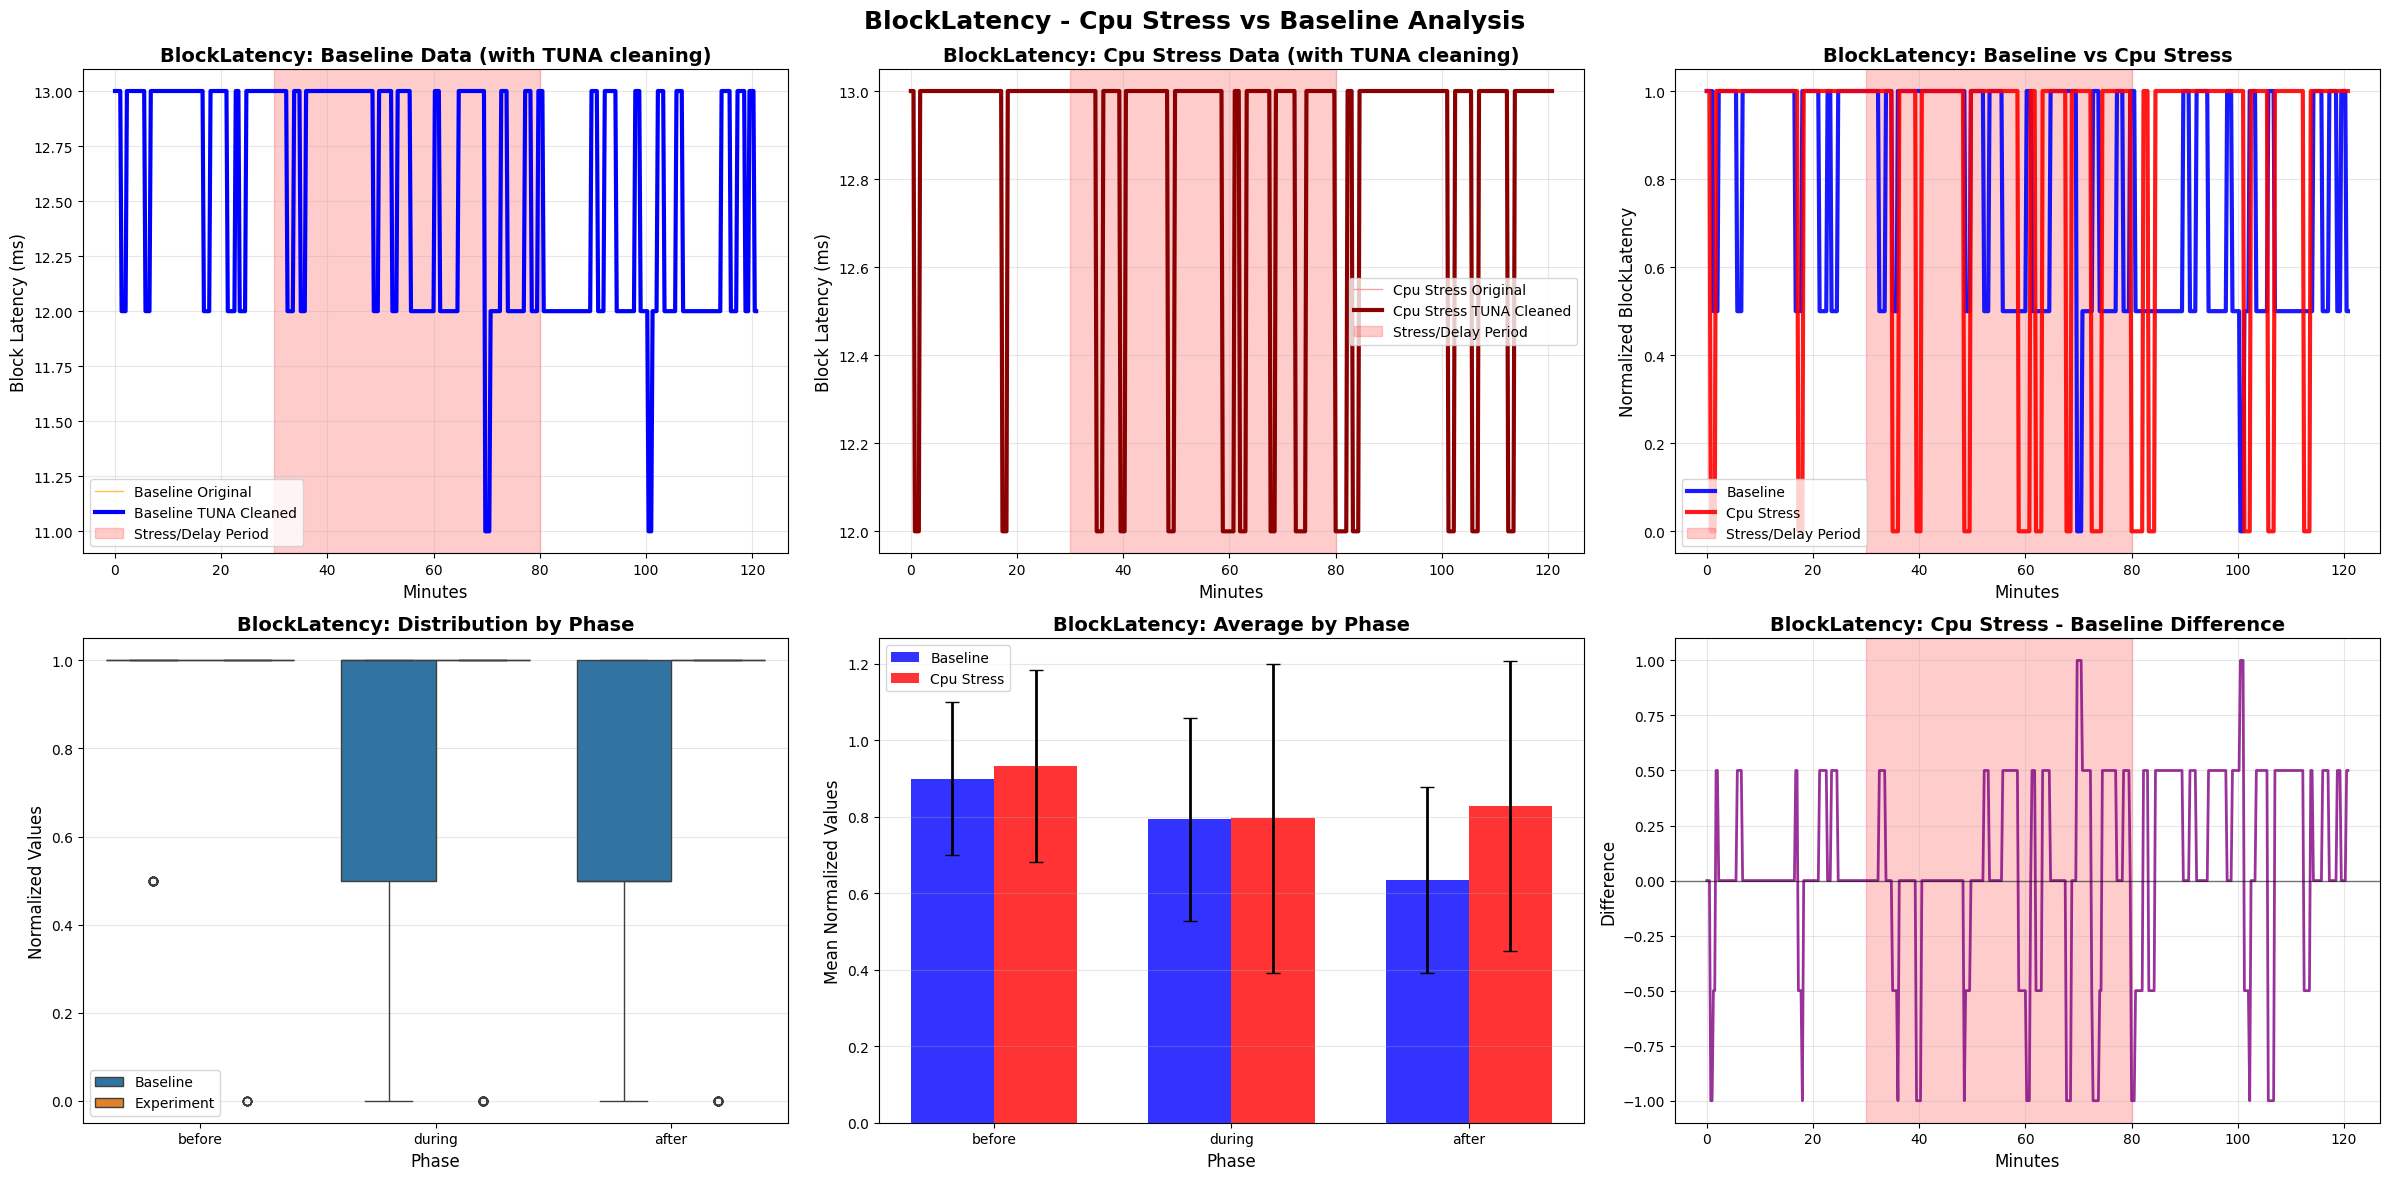


BLOCKLATENCY - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.6350  0.2426  0.0  1.0
before  0.9000  0.2008  0.5  1.0
during  0.7935  0.2663  0.0  1.0

CPU STRESS STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.8282  0.3784  0.0  1.0
before  0.9333  0.2505  0.0  1.0
during  0.7960  0.4040  0.0  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -1.14, p=  0.2566 (NOT SIGNIFICANT)
  DURING  : t= -0.07, p=  0.9419 (NOT SIGNIFICANT)
  AFTER   : t= -5.49, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :   +3.70% (INCREASE)
  DURING  :   +0.31% (INCREASE)
  AFTER   :  +30.43% (INCREASE)

DISK I/O METRICS DETAILS:
  Metric: BlockLatency
  Metric type: Block Latency (

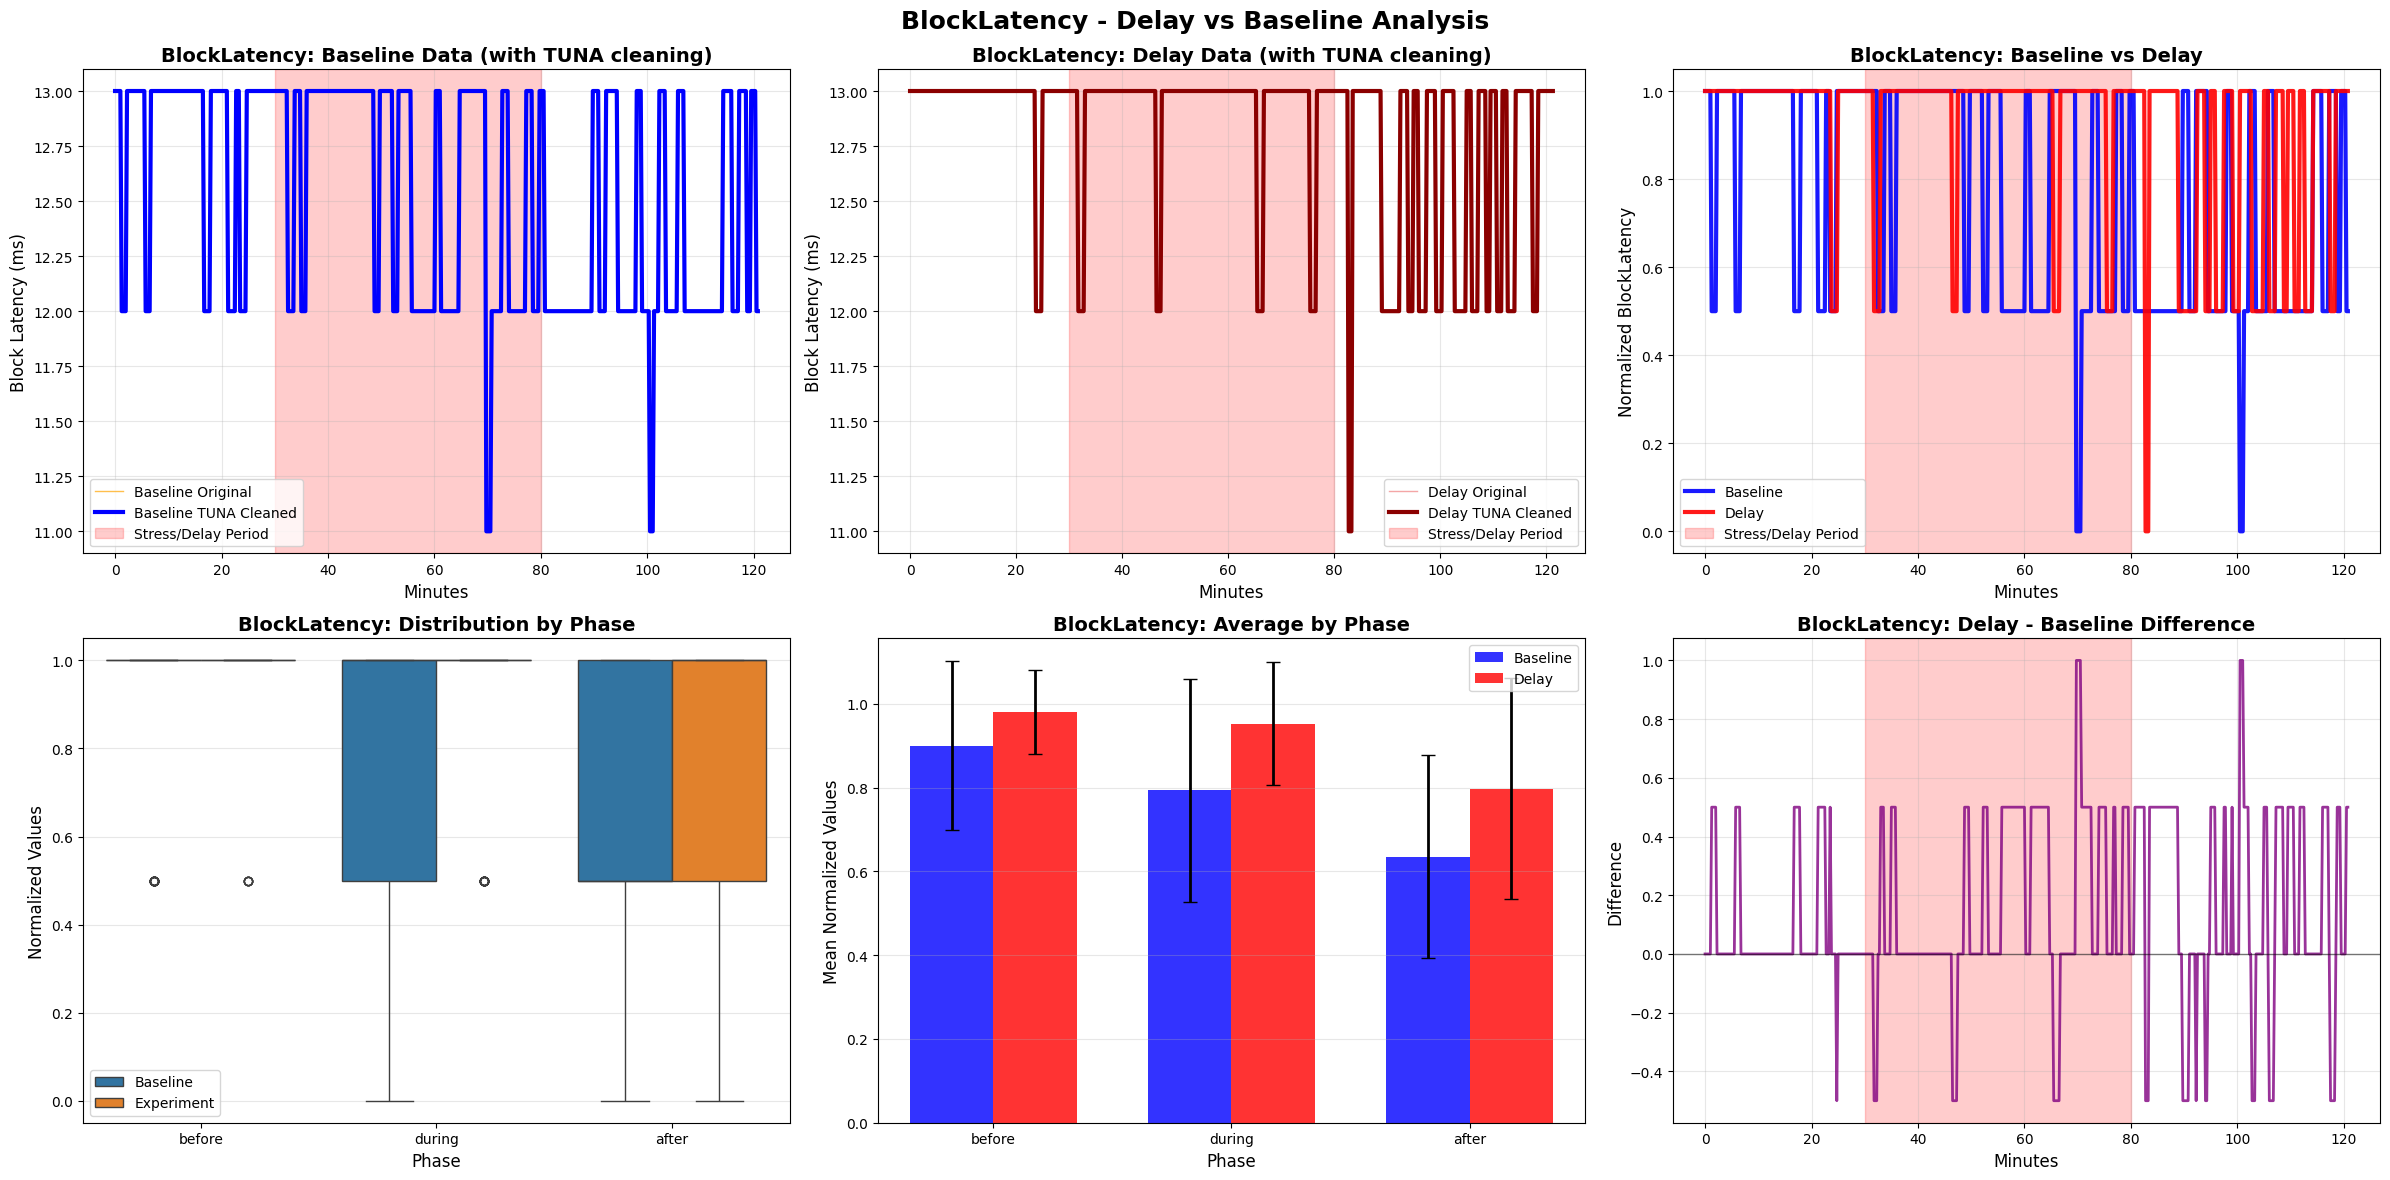


BLOCKLATENCY - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.6350  0.2426  0.0  1.0
before  0.9000  0.2008  0.5  1.0
during  0.7935  0.2663  0.0  1.0

DELAY STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.7975  0.2643  0.0  1.0
before  0.9792  0.1003  0.5  1.0
during  0.9527  0.1466  0.5  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -3.86, p=  0.0001 (SIGNIFICANT)
  DURING  : t= -7.42, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -5.79, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :   +8.80% (INCREASE)
  DURING  :  +20.06% (INCREASE)
  AFTER   :  +25.60% (INCREASE)

DISK I/O METRICS DETAILS:
  Metric: BlockLatency
  Metric type: Block Latency (ms)
  Columns analyzed: ['di

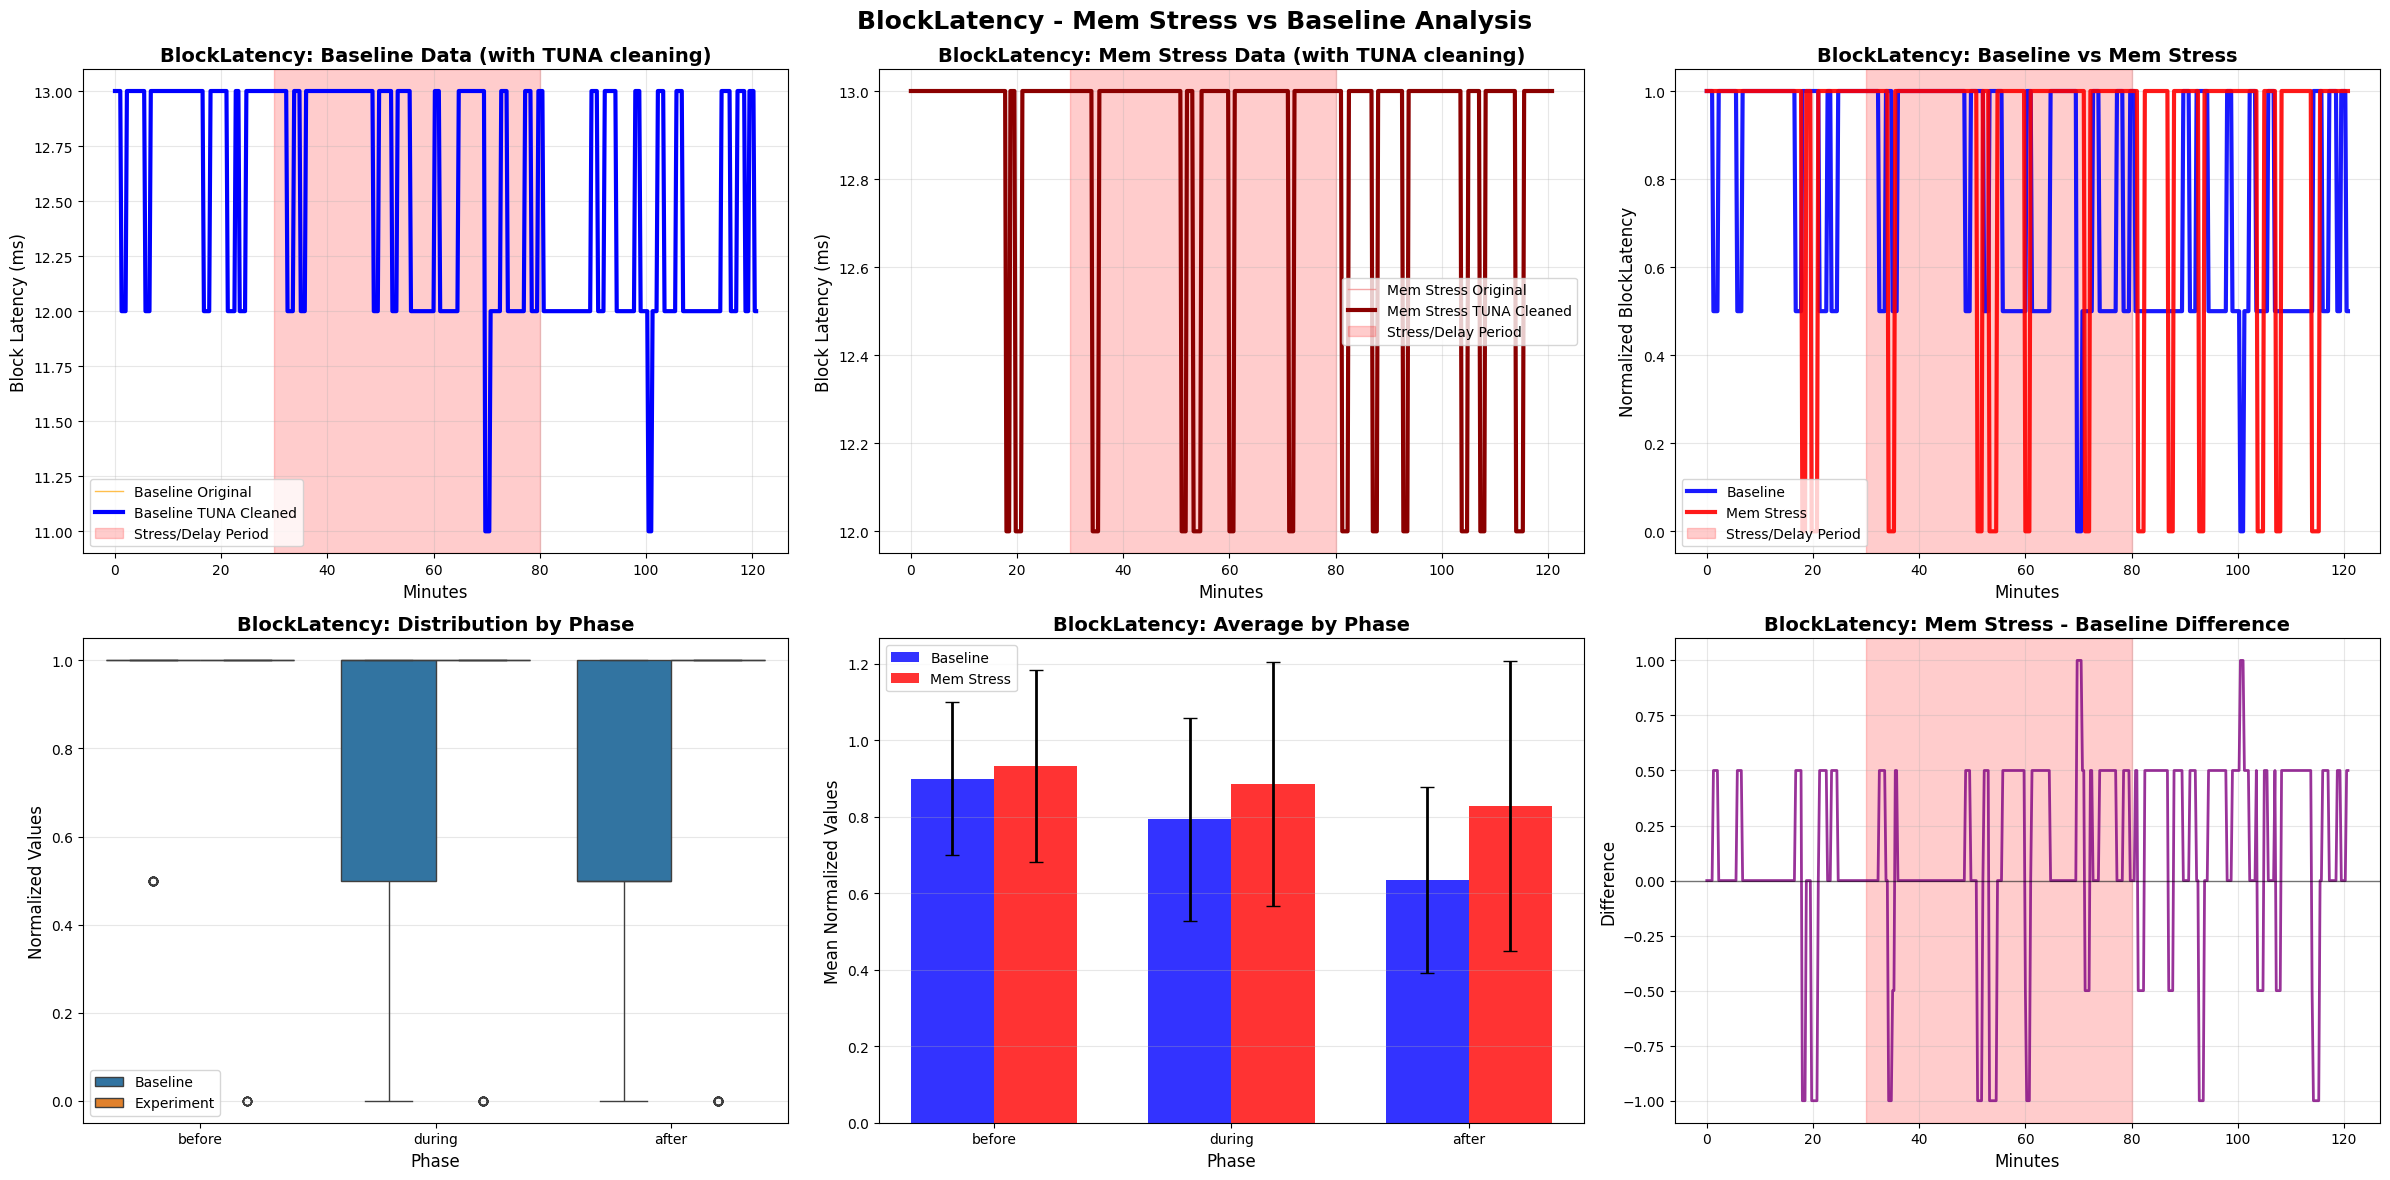


BLOCKLATENCY - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.6350  0.2426  0.0  1.0
before  0.9000  0.2008  0.5  1.0
during  0.7935  0.2663  0.0  1.0

MEM STRESS STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.8282  0.3784  0.0  1.0
before  0.9333  0.2505  0.0  1.0
during  0.8856  0.3191  0.0  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -1.14, p=  0.2566 (NOT SIGNIFICANT)
  DURING  : t= -3.14, p=  0.0018 (SIGNIFICANT)
  AFTER   : t= -5.49, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :   +3.70% (INCREASE)
  DURING  :  +11.60% (INCREASE)
  AFTER   :  +30.43% (INCREASE)

DISK I/O METRICS DETAILS:
  Metric: BlockLatency
  Metric type: Block Latency (ms)


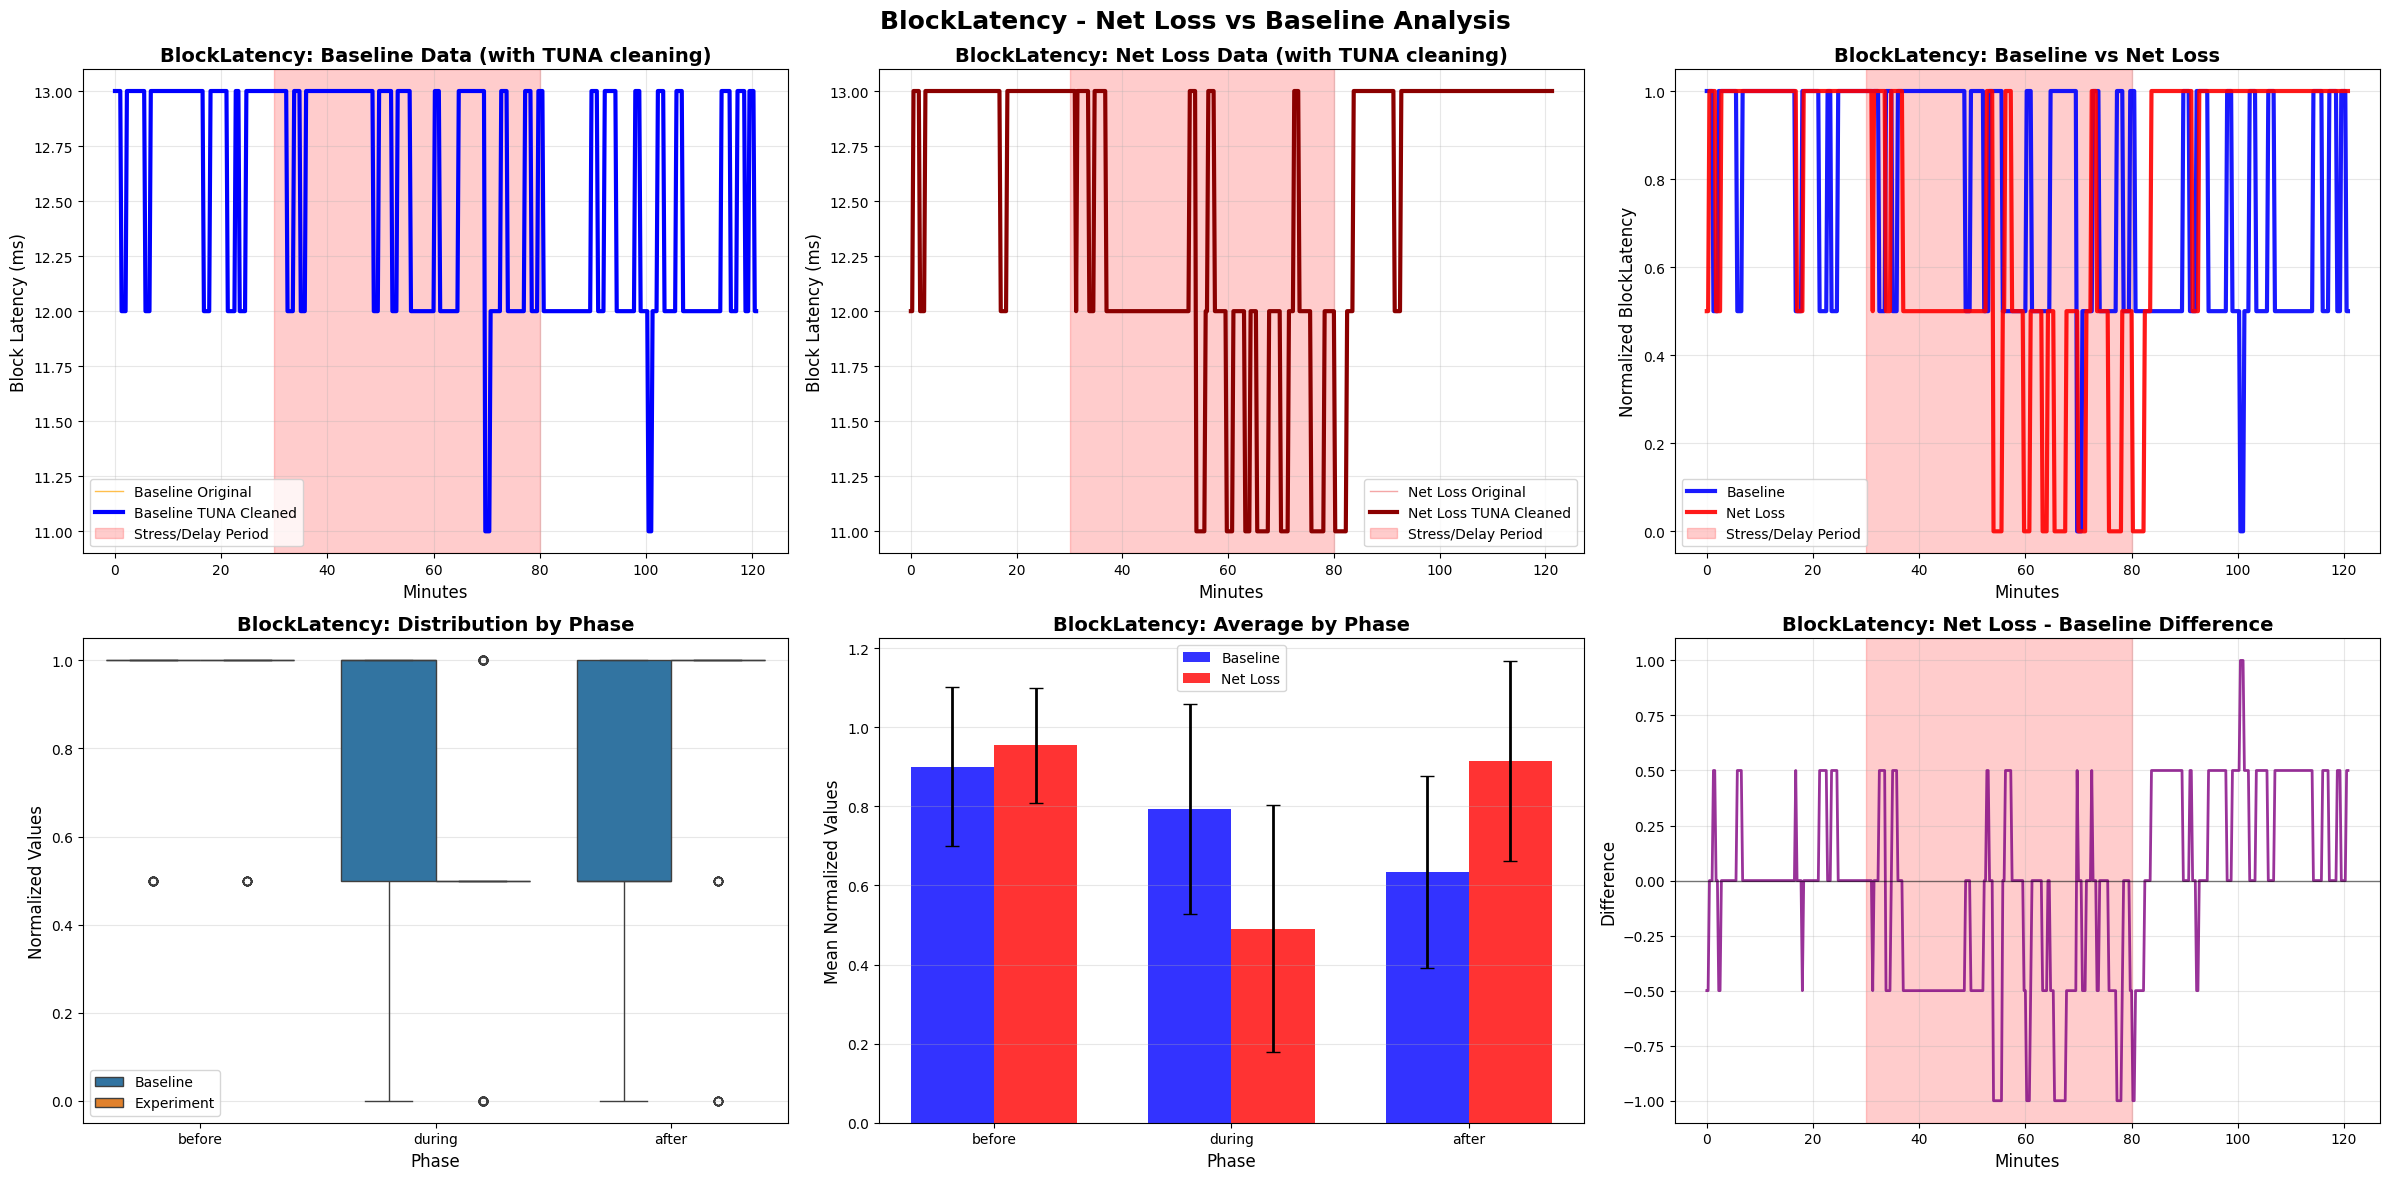


BLOCKLATENCY - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: 1.000

BASELINE STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.6350  0.2426  0.0  1.0
before  0.9000  0.2008  0.5  1.0
during  0.7935  0.2663  0.0  1.0

NET LOSS STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.9141  0.2521  0.0  1.0
before  0.9542  0.1449  0.5  1.0
during  0.4900  0.3121  0.0  1.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.40, p=  0.0173 (SIGNIFICANT)
  DURING  : t= 10.49, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-10.19, p=  0.0000 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :   +6.02% (INCREASE)
  DURING  :  -38.24% (DECREASE)
  AFTER   :  +43.96% (INCREASE)

DISK I/O METRICS DETAILS:
  Metric: BlockLatency
  Metric type: Block Latency (ms)
  Columns an

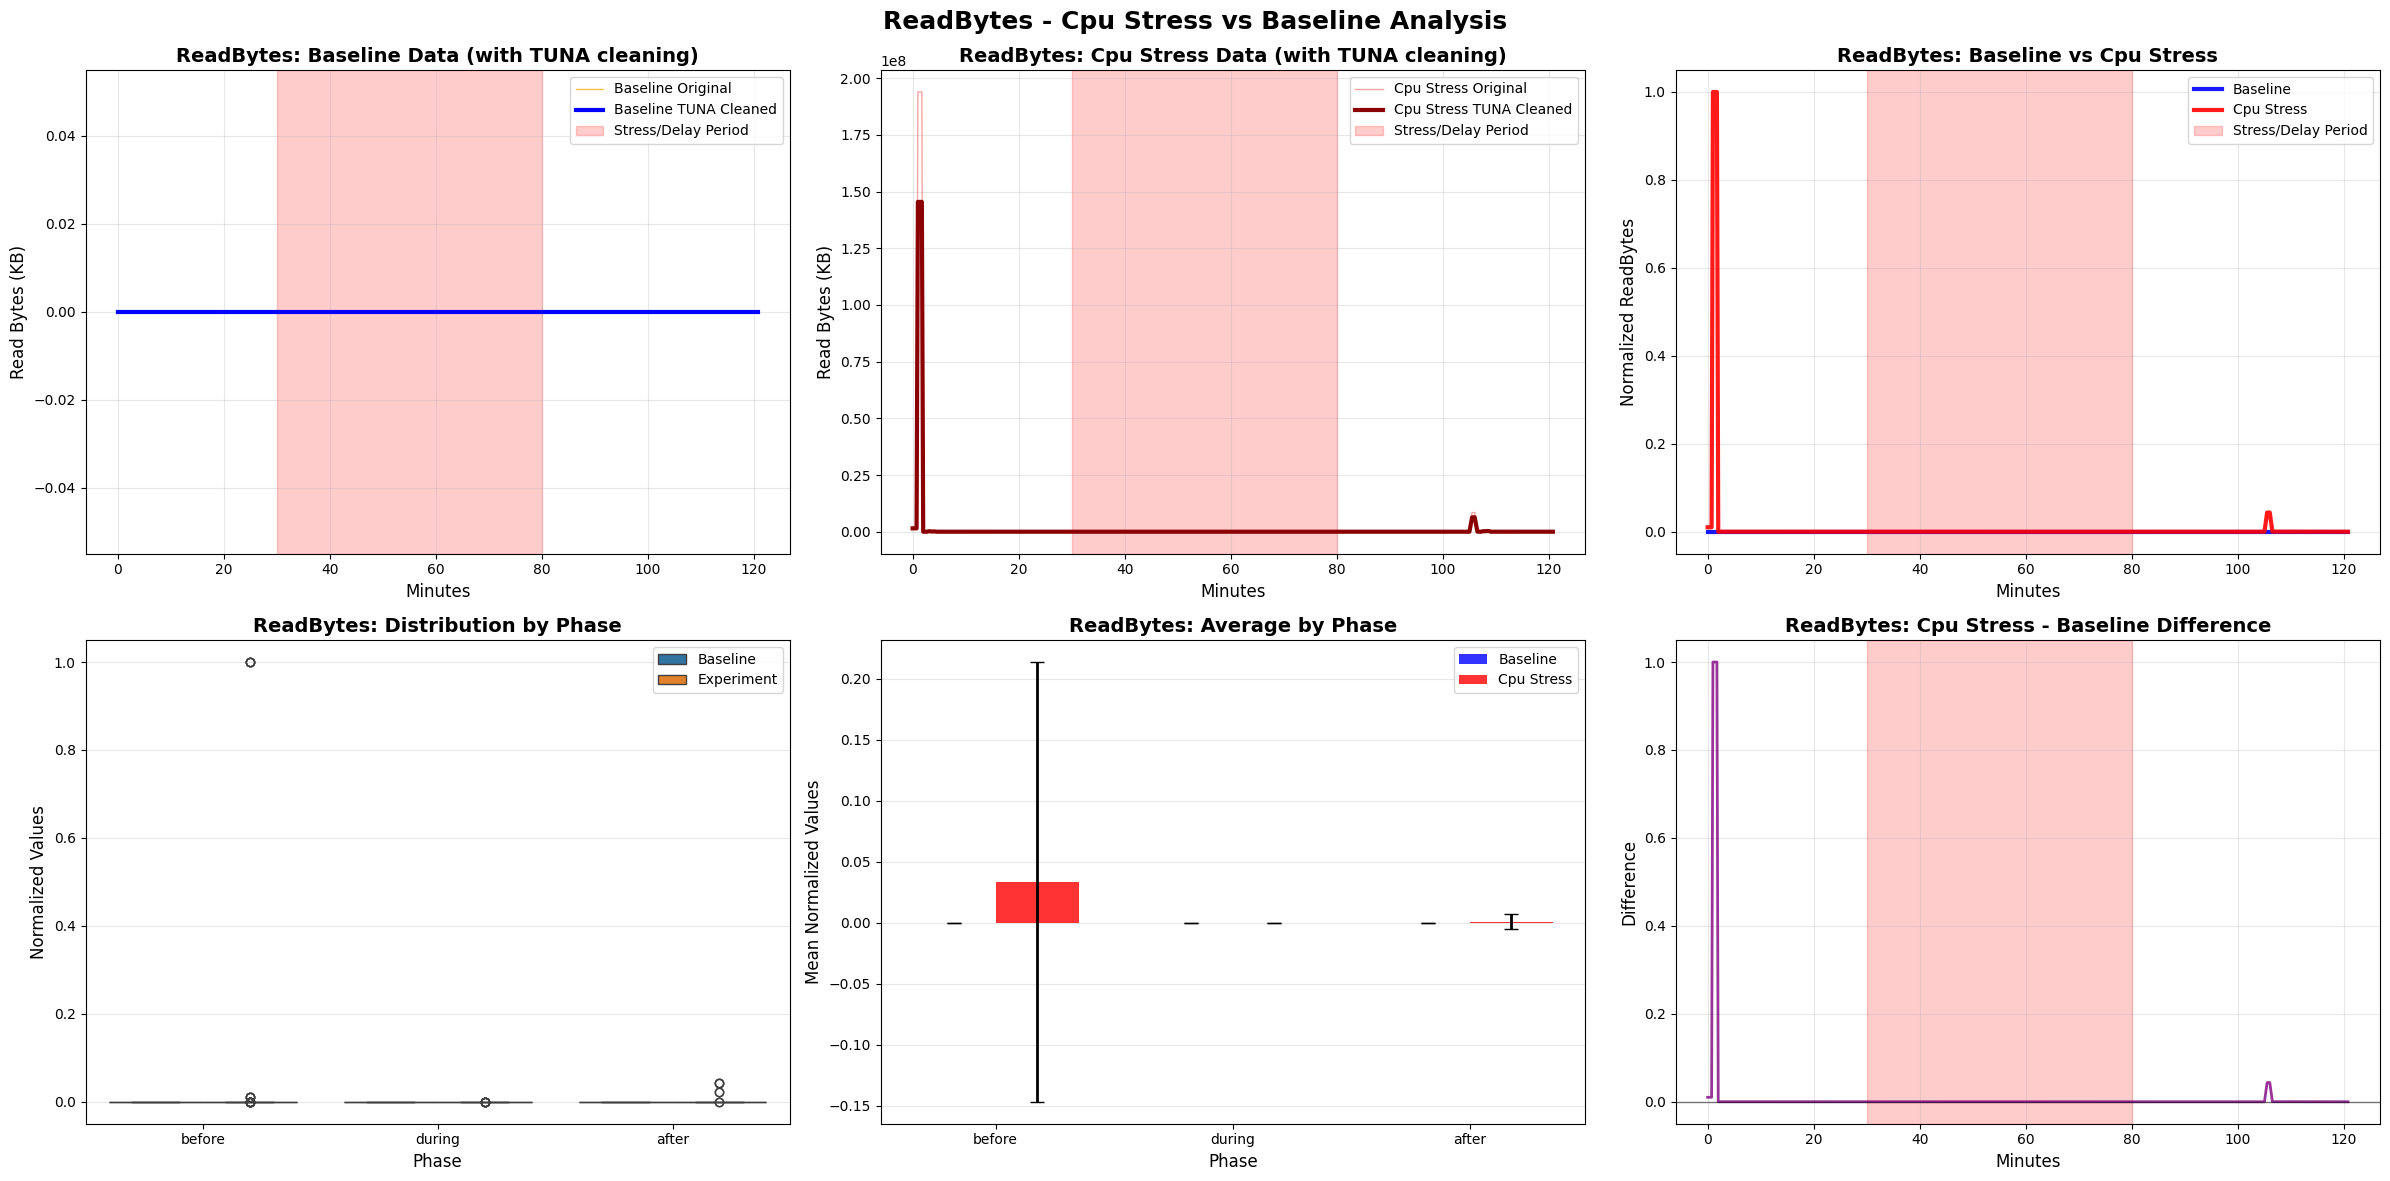


READBYTES - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 25 outliers removed
    Noise Reduction: 25.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

CPU STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0011  0.0063  0.0  0.0437
before  0.0337  0.1802  0.0  1.0000
during  0.0000  0.0001  0.0  0.0003

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.05, p=  0.0417 (SIGNIFICANT)
  DURING  : t= -2.69, p=  0.0075 (SIGNIFICANT)
  AFTER   : t= -2.17, p=  0.0309 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   :   +0.00% (NO CHANGE)

DISK I/O METRICS DETAILS:
  Metric: ReadBytes
  Metric type: Read Bytes (KB)
  Columns analyzed: 

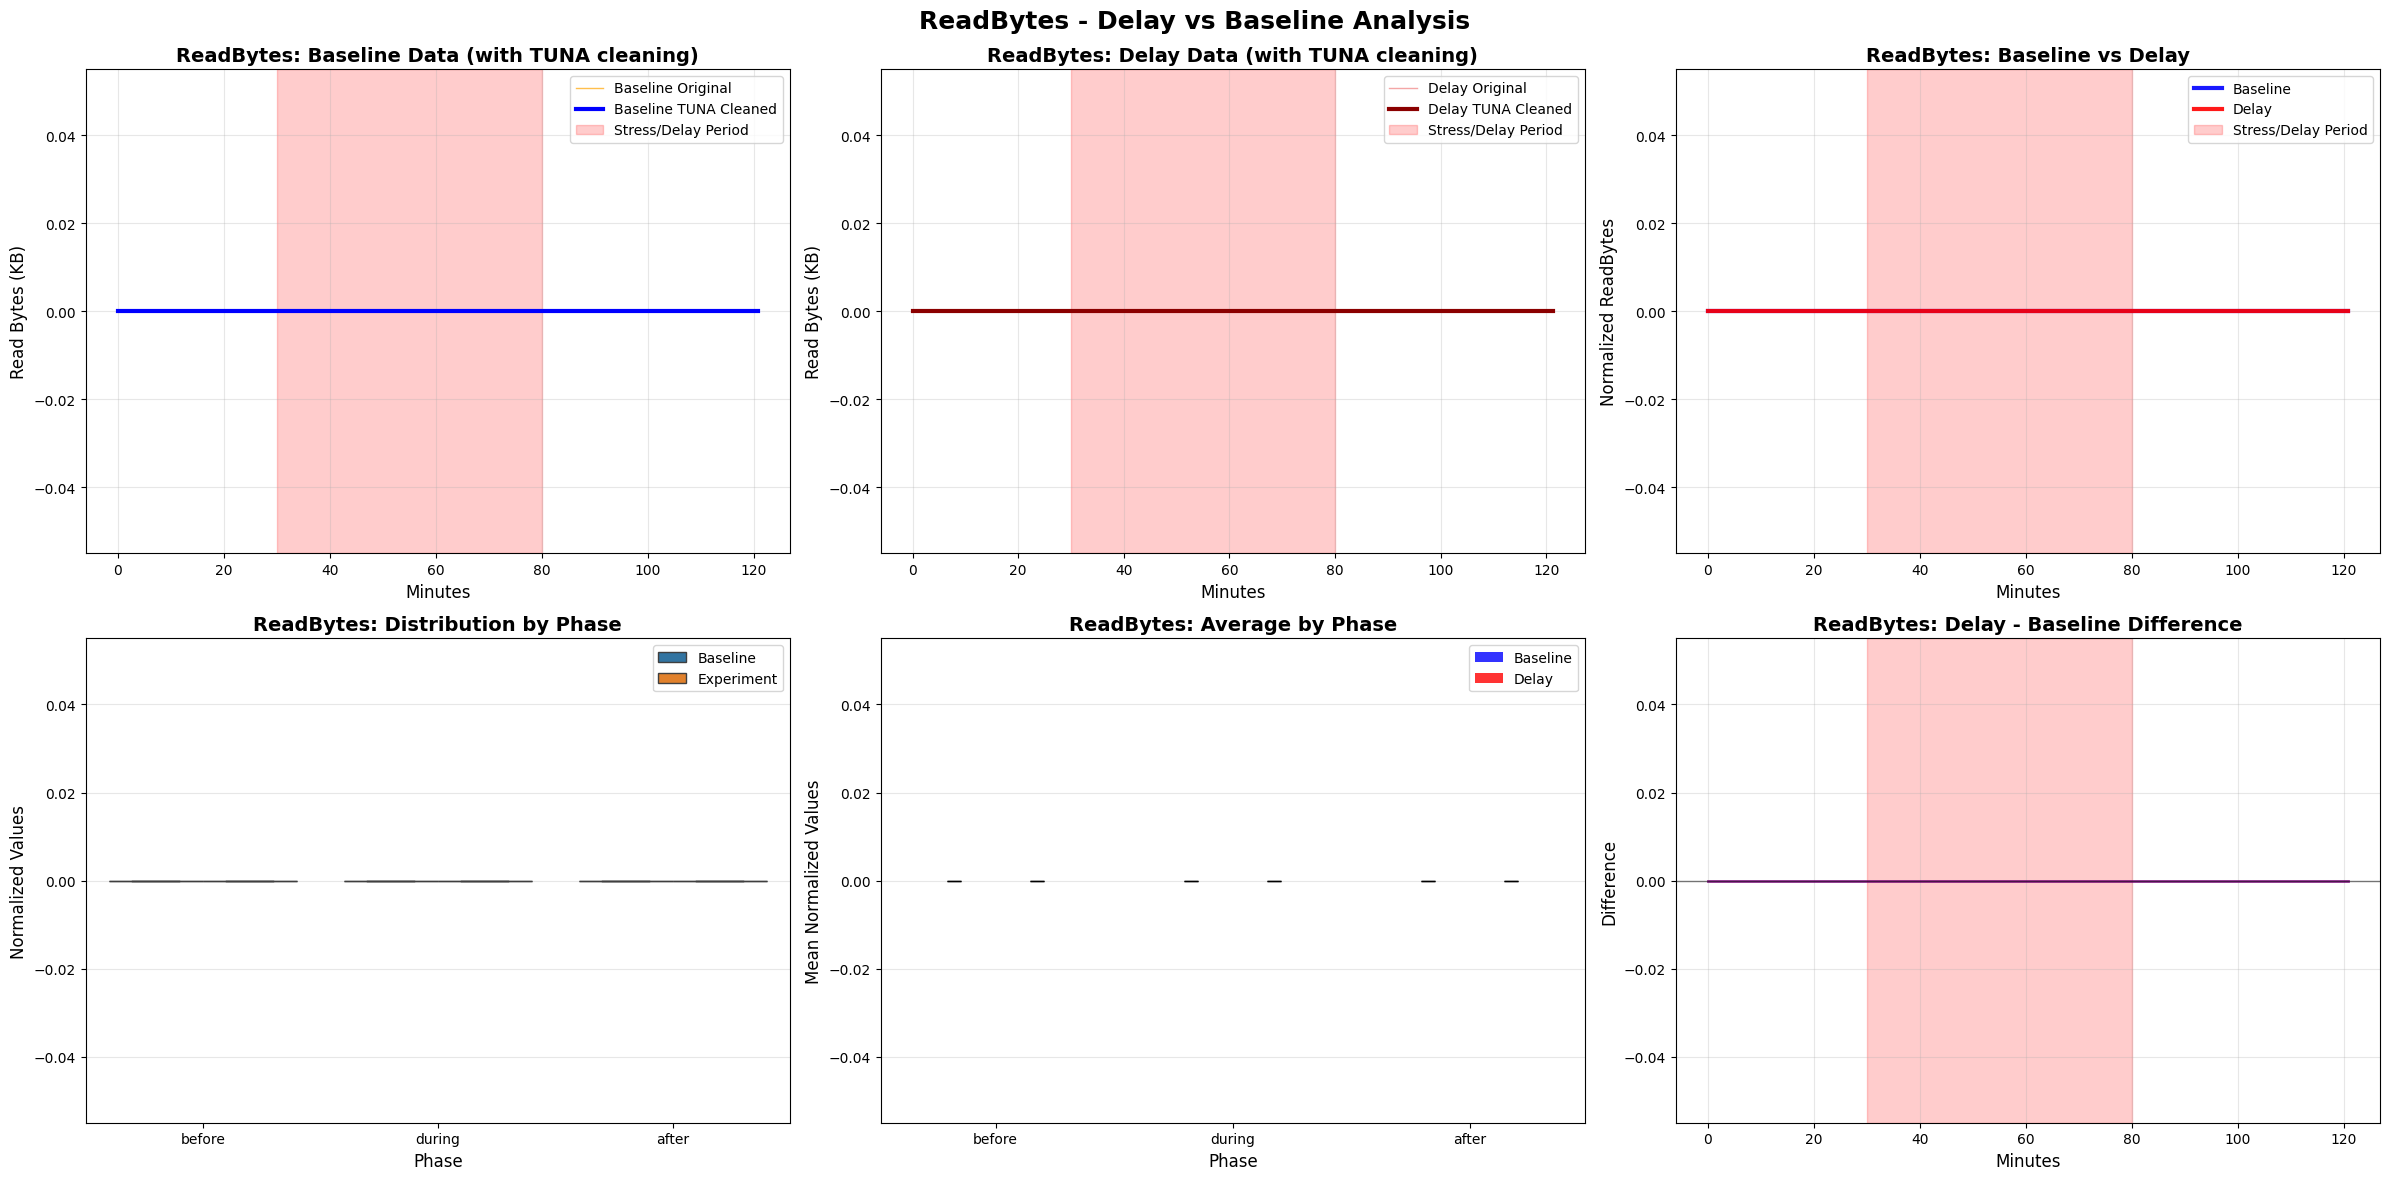


READBYTES - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: nan
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

DELAY STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (NOT SIGNIFICANT)
  AFTER   : t=   nan, p=     nan (NOT SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   :   +0.00% (NO CHANGE)

DISK I/O METRICS DETAILS:
  Metric: ReadBytes
  Metric type: Read Bytes (KB)
  Columns analyzed: ['openeuler-home', 'openeuler-root', 'openeuler-swap

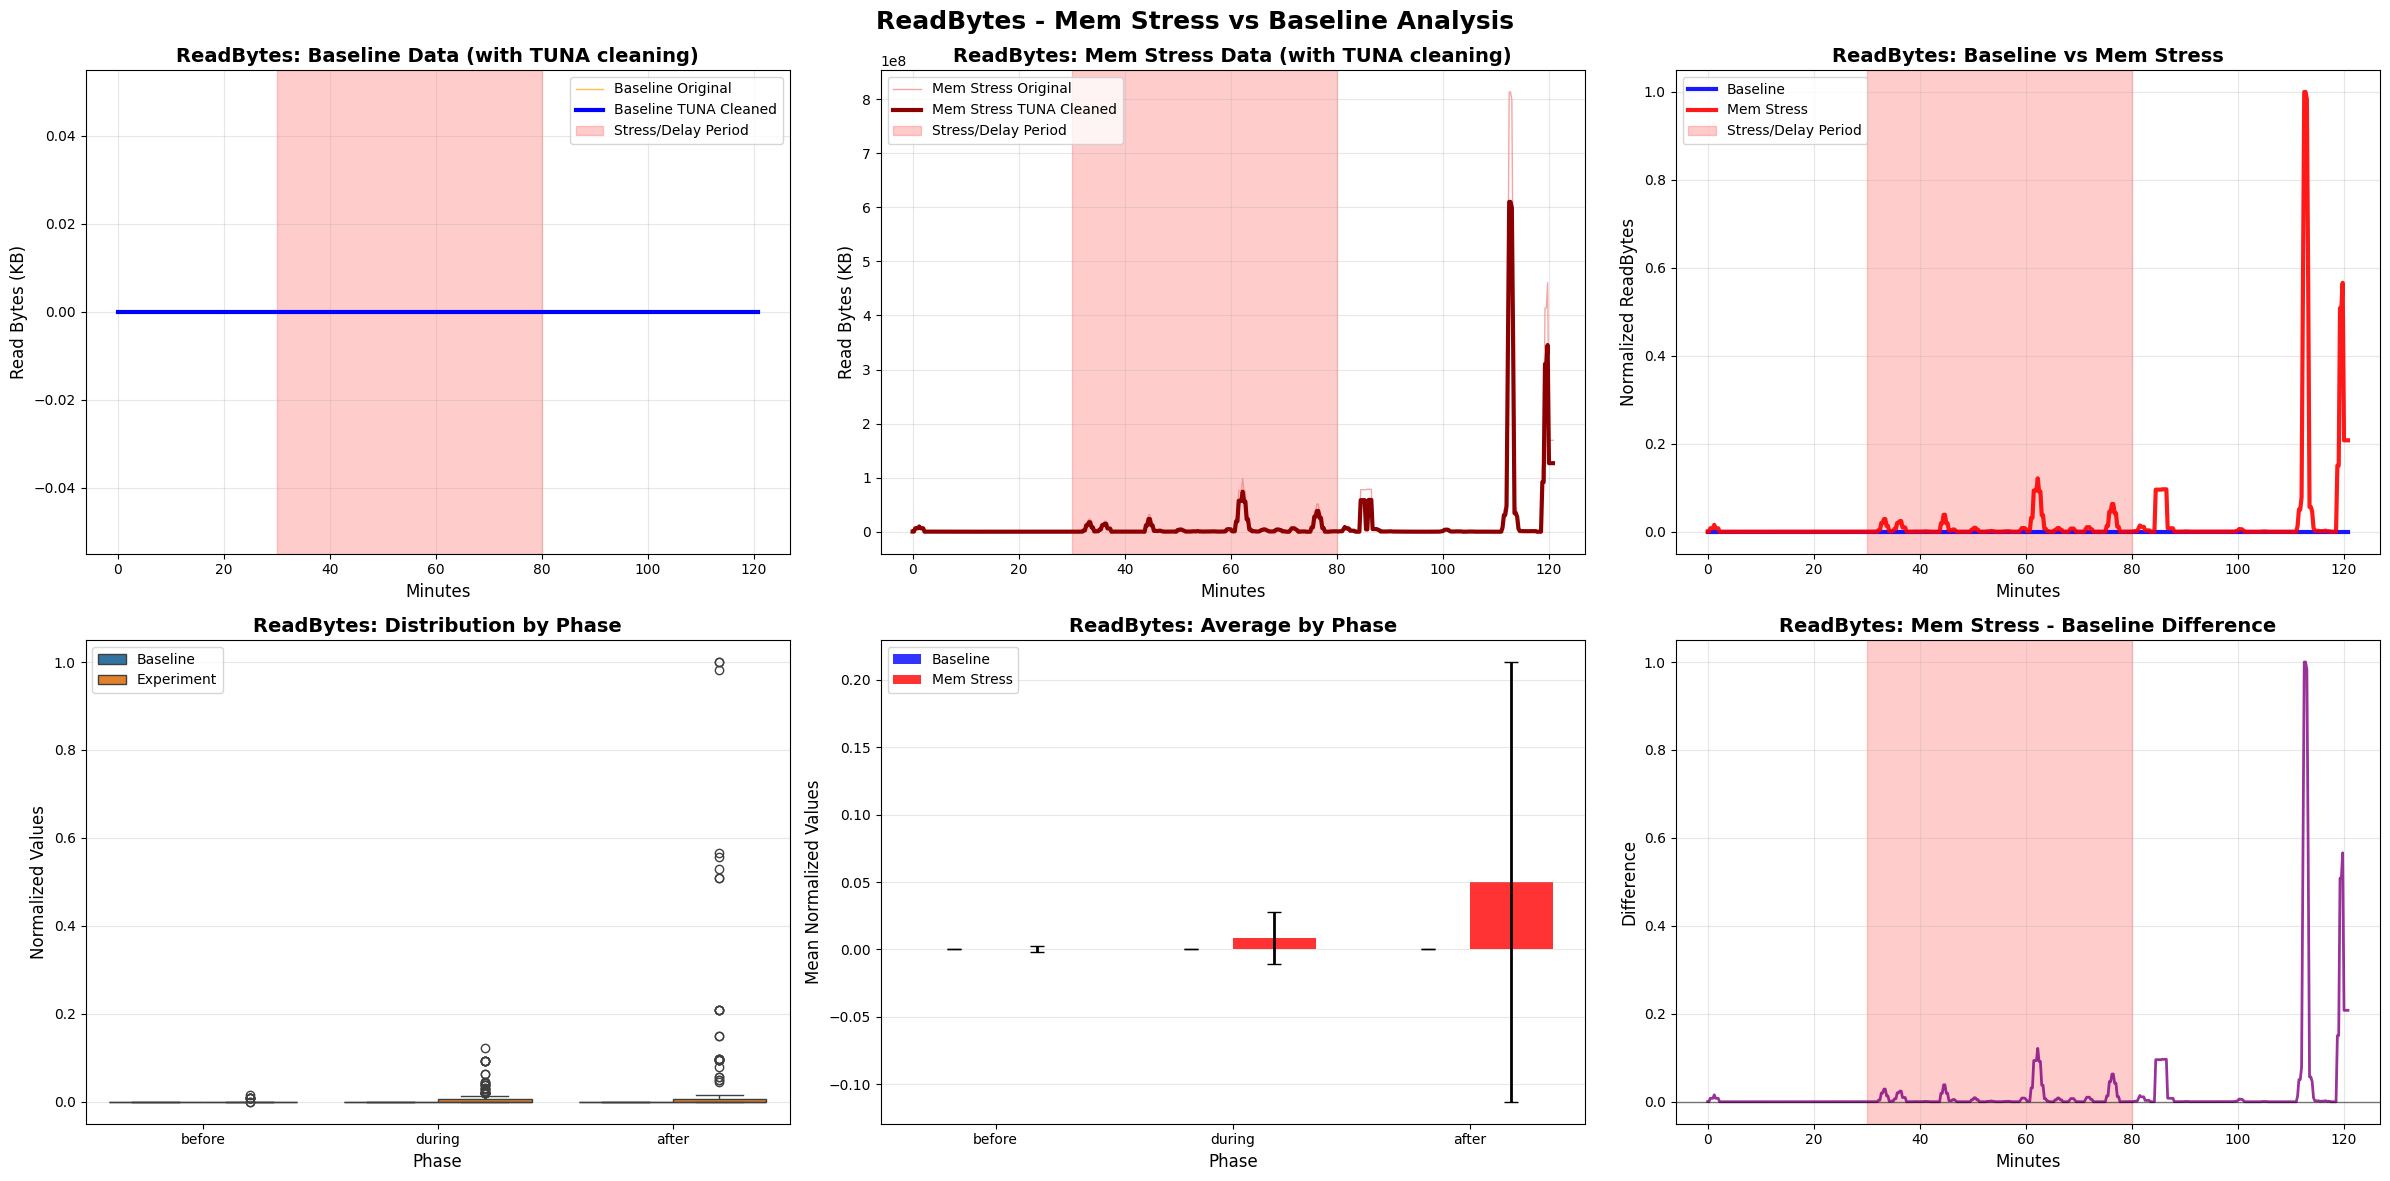


READBYTES - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 136 outliers removed
    Noise Reduction: 25.1%, Correlation: 0.998
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

MEM STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0501  0.1630  0.0  1.0000
before  0.0005  0.0022  0.0  0.0157
during  0.0086  0.0194  0.0  0.1214

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -2.61, p=  0.0097 (SIGNIFICANT)
  DURING  : t= -6.32, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -3.92, p=  0.0001 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   :   +0.00% (NO CHANGE)

DISK I/O METRICS DETAILS:
  Metric: ReadBytes
  Metric type: Read Bytes (KB)
  Columns analyzed:

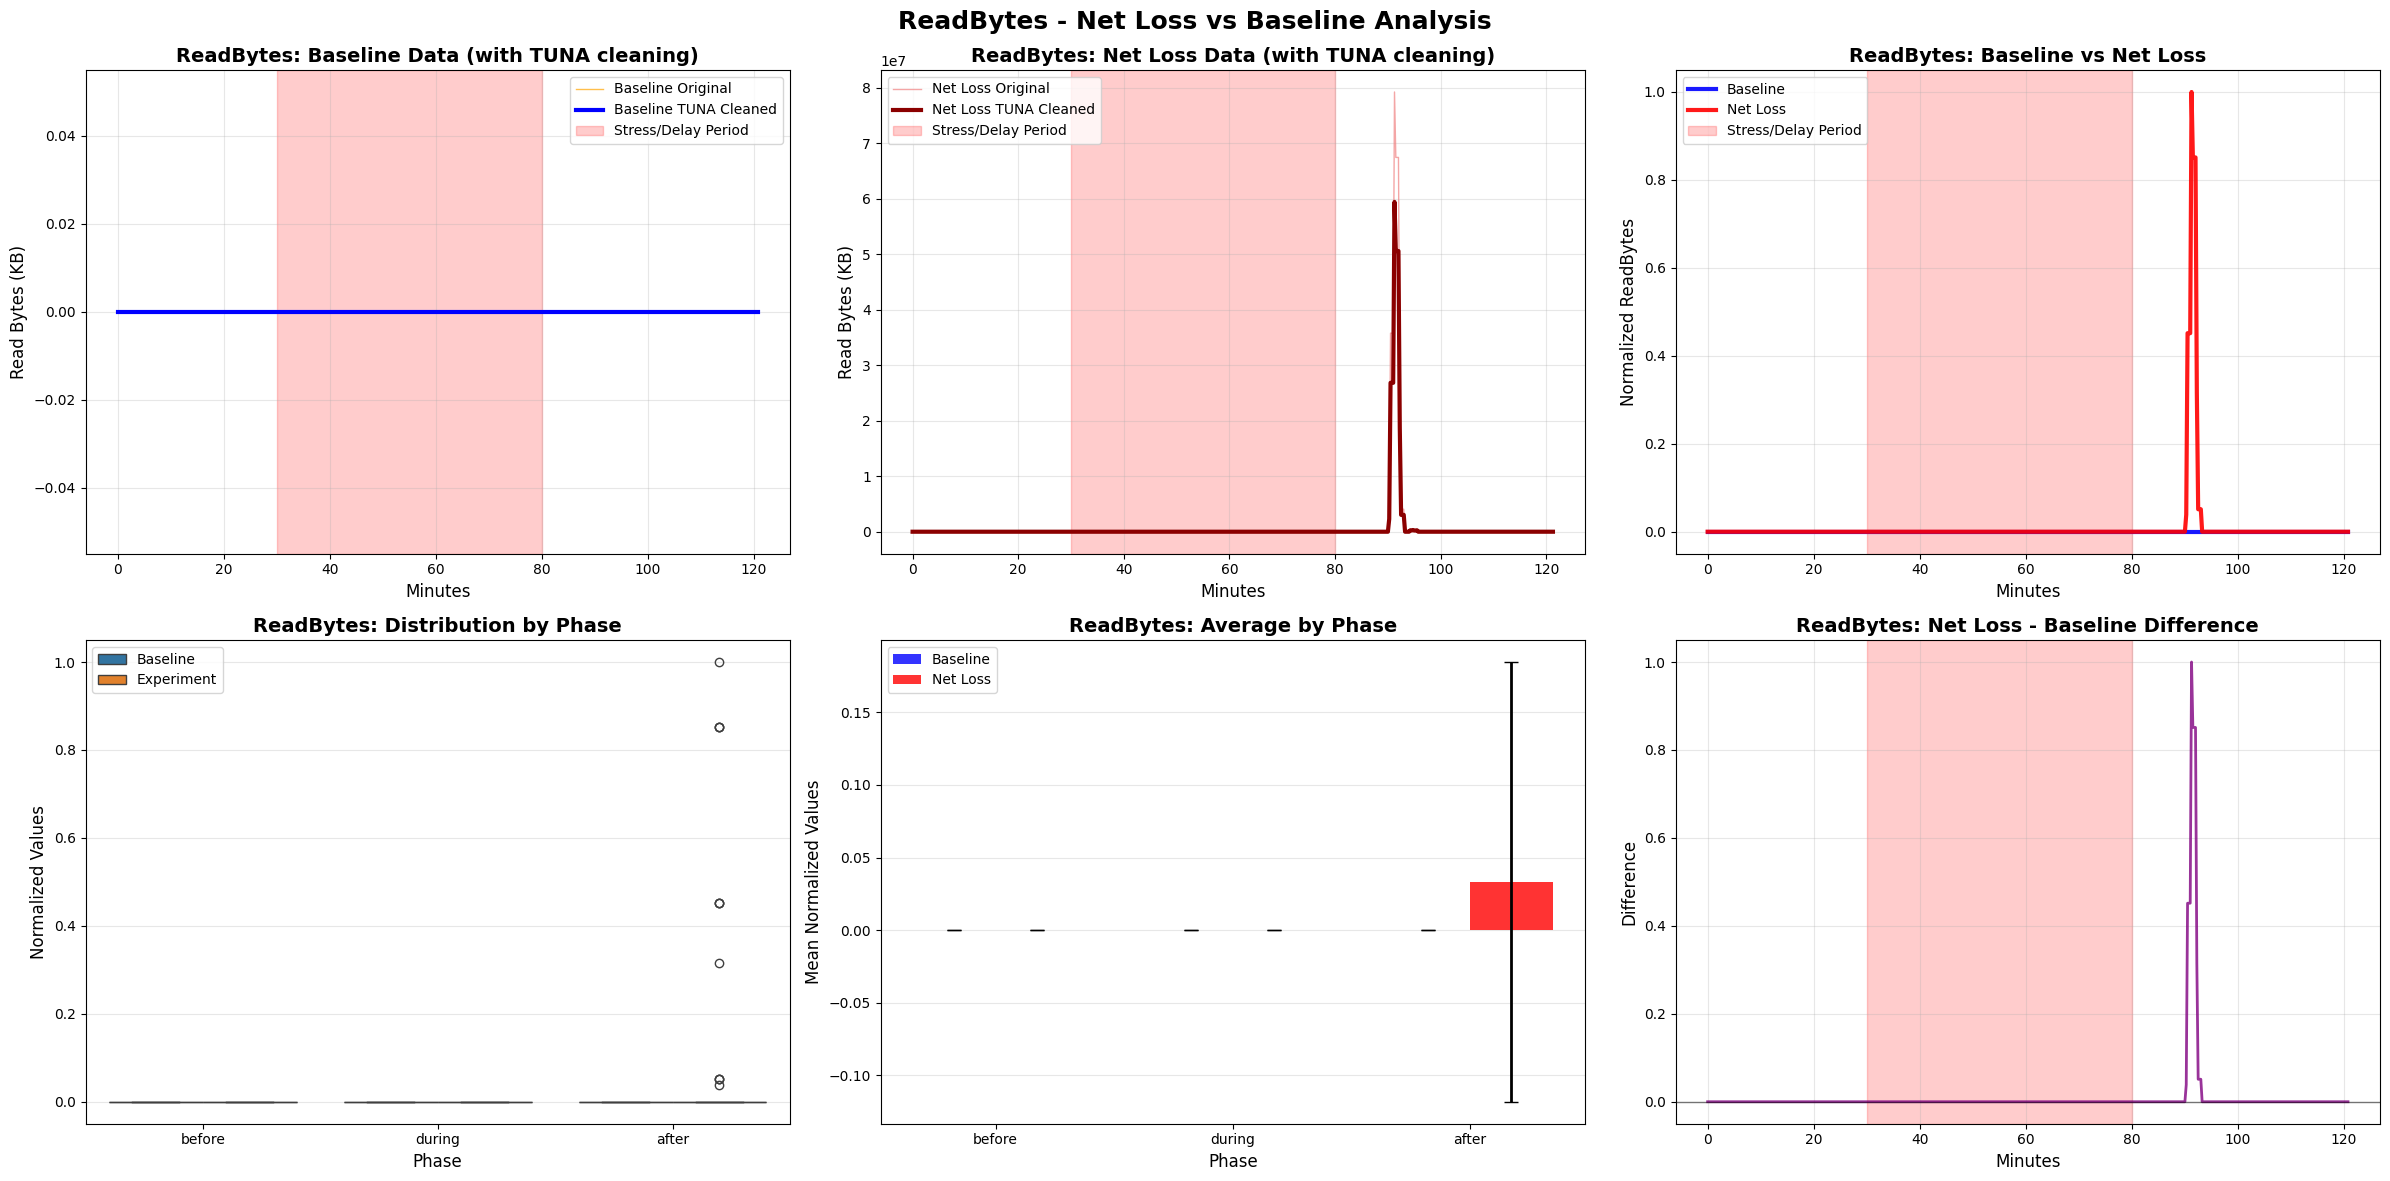


READBYTES - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 20 outliers removed
    Noise Reduction: 25.0%, Correlation: 1.000
  BASELINE: 0 outliers removed
    Noise Reduction: 0.0%, Correlation: nan

BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0  0.0  0.0
before   0.0  0.0  0.0  0.0
during   0.0  0.0  0.0  0.0

NET LOSS STATISTICS BY PHASE:
          mean     std  min  max
phase                           
after   0.0332  0.1514  0.0  1.0
before  0.0000  0.0000  0.0  0.0
during  0.0000  0.0000  0.0  0.0

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (NOT SIGNIFICANT)
  AFTER   : t= -2.80, p=  0.0054 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :   +0.00% (NO CHANGE)
  DURING  :   +0.00% (NO CHANGE)
  AFTER   :   +0.00% (NO CHANGE)

DISK I/O METRICS DETAILS:
  Metric: ReadBytes
  Metric type: Read Bytes (KB)
  Columns analyzed: ['openeuler-hom

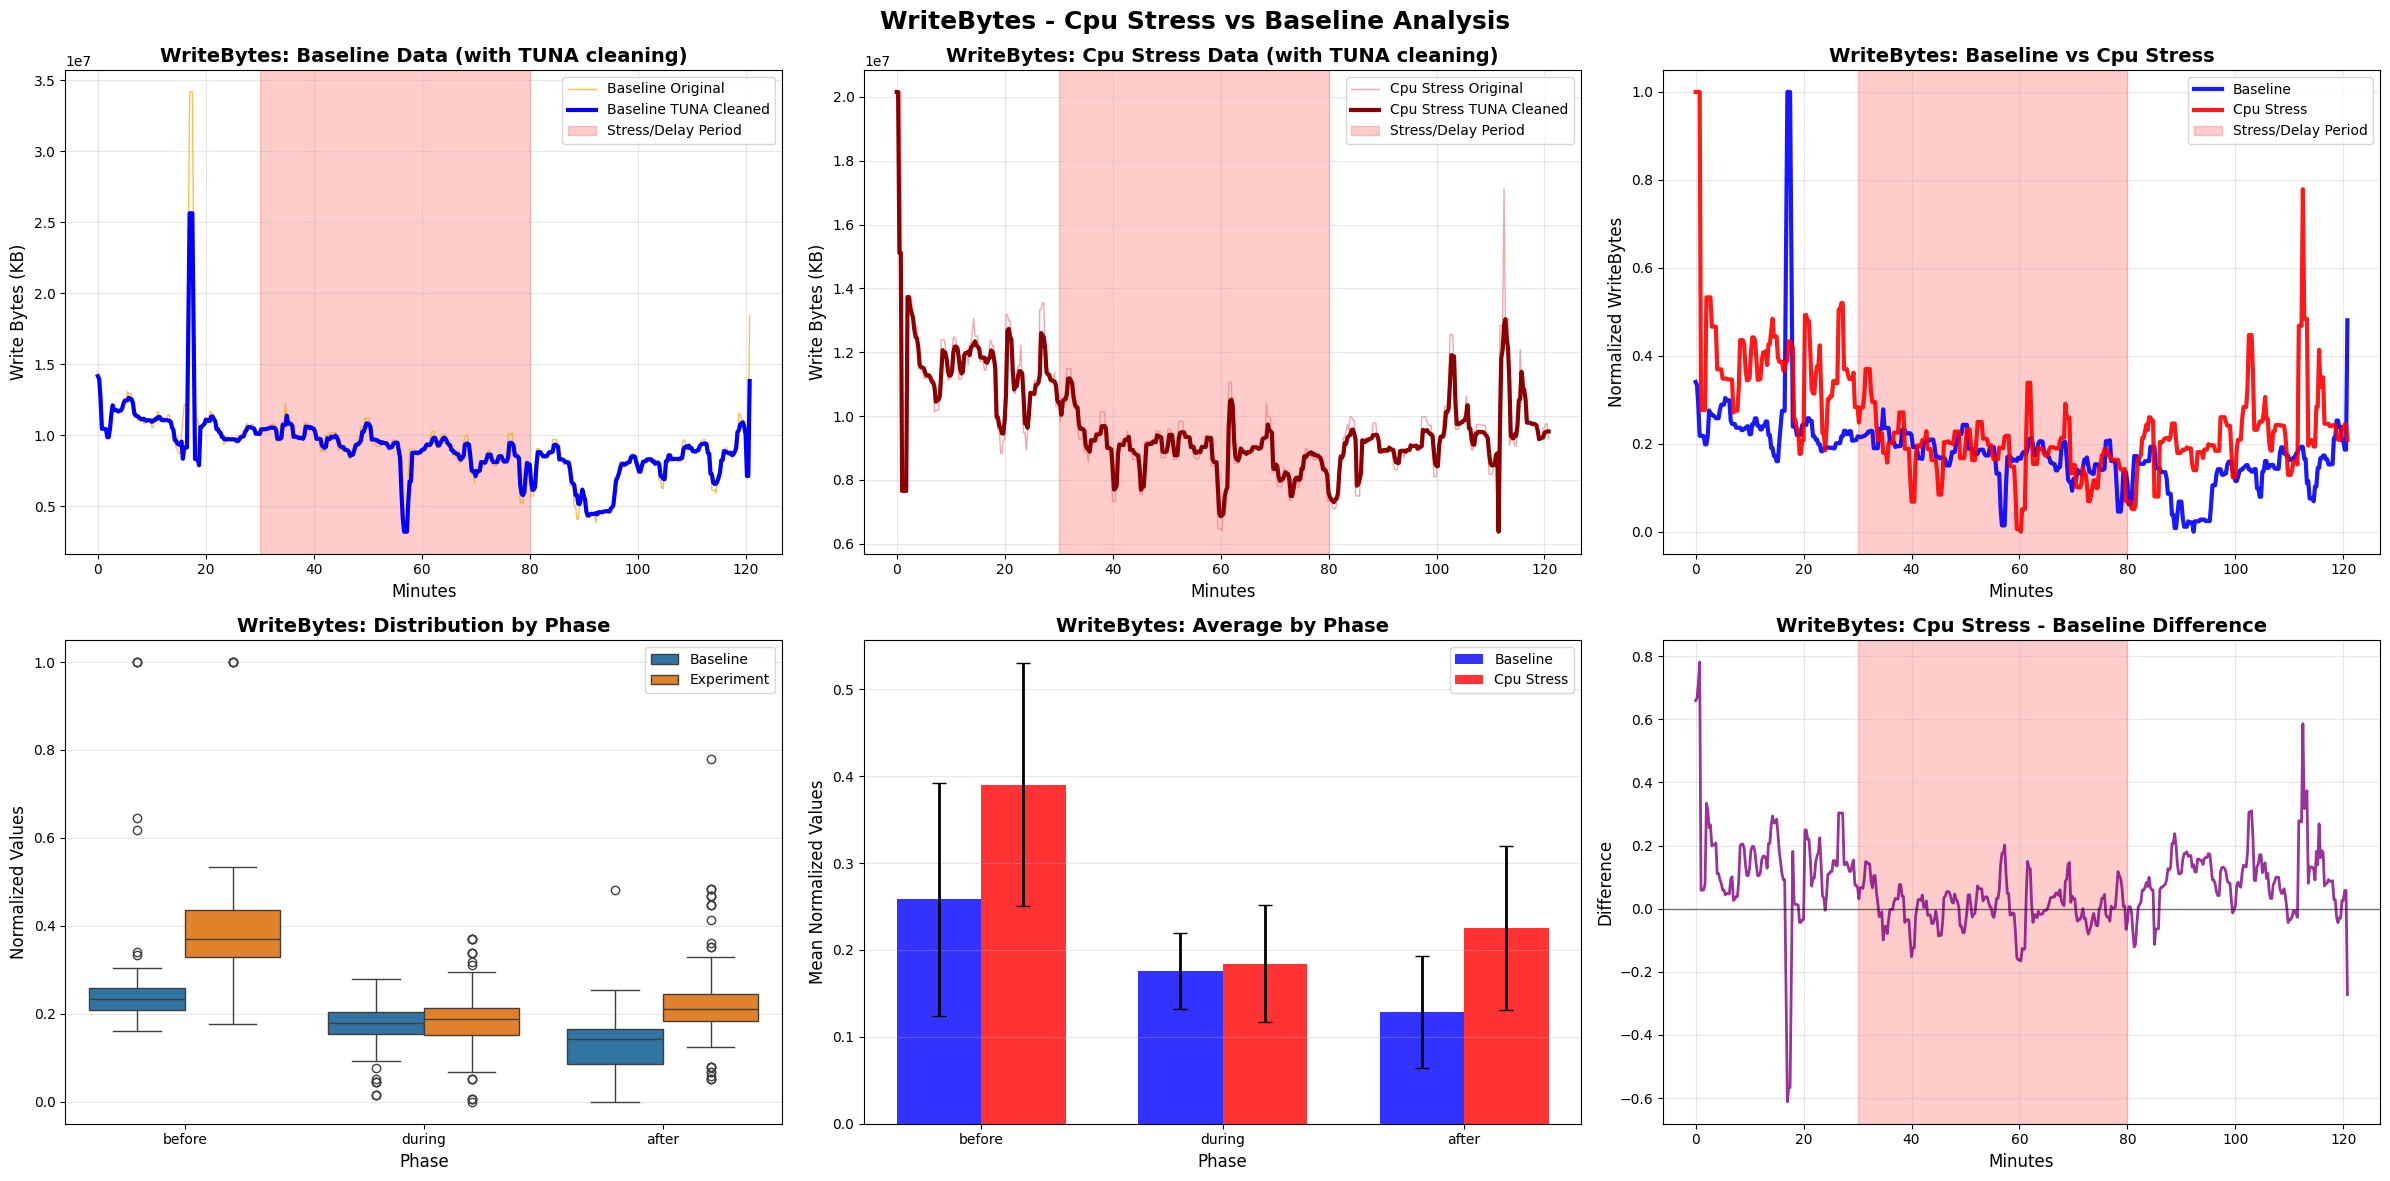


WRITEBYTES - CPU STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  CPU STRESS: 8 outliers removed
    Noise Reduction: 13.2%, Correlation: 0.935
  BASELINE: 24 outliers removed
    Noise Reduction: 21.2%, Correlation: 0.954

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.1290  0.0643  0.0000  0.4808
before  0.2583  0.1341  0.1603  1.0000
during  0.1756  0.0435  0.0143  0.2784

CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2254  0.0940  0.0512  0.7789
before  0.3901  0.1401  0.1771  1.0000
during  0.1842  0.0671  0.0000  0.3699

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -7.44, p=  0.0000 (SIGNIFICANT)
  DURING  : t= -1.52, p=  0.1283 (NOT SIGNIFICANT)
  AFTER   : t=-10.81, p=  0.0000 (SIGNIFICANT)

CPU STRESS IMPACT:
  BEFORE  :  +51.01% (INCREASE)
  DURING  :   +4.89% (INCREASE)
  AFTER   :  +74.77% (INCREASE)

DISK I/O METRICS DETAI

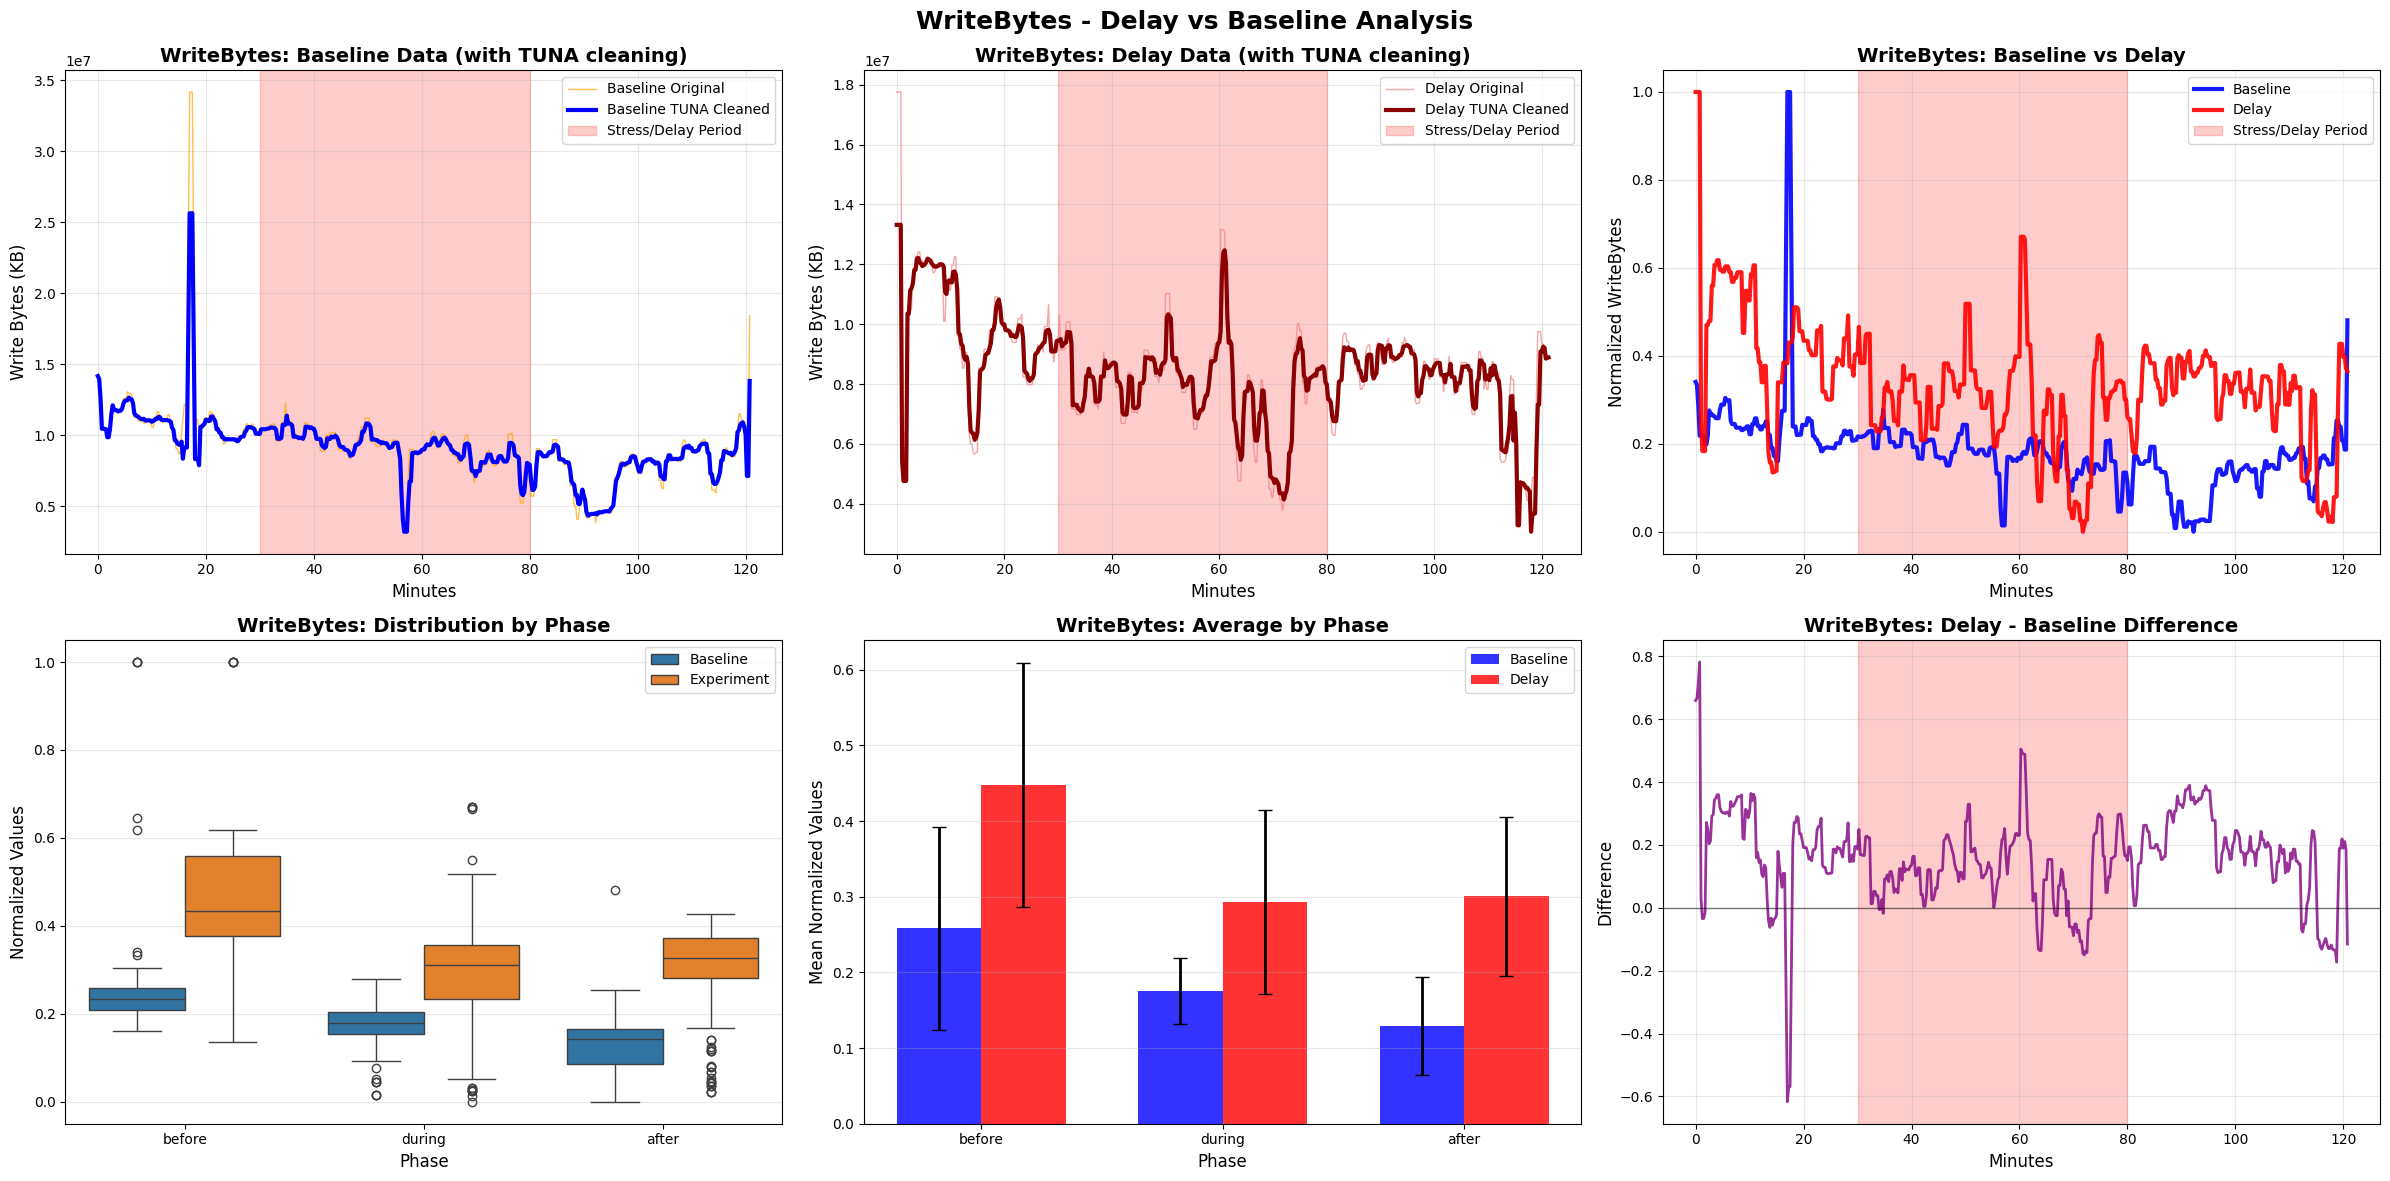


WRITEBYTES - DELAY VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  DELAY: 18 outliers removed
    Noise Reduction: 11.0%, Correlation: 0.937
  BASELINE: 24 outliers removed
    Noise Reduction: 21.2%, Correlation: 0.954

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.1290  0.0643  0.0000  0.4808
before  0.2583  0.1341  0.1603  1.0000
during  0.1756  0.0435  0.0143  0.2784

DELAY STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.3006  0.1048  0.0217  0.4272
before  0.4479  0.1609  0.1351  1.0000
during  0.2933  0.1212  0.0000  0.6710

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -9.92, p=  0.0000 (SIGNIFICANT)
  DURING  : t=-12.95, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=-17.83, p=  0.0000 (SIGNIFICANT)

DELAY IMPACT:
  BEFORE  :  +73.39% (INCREASE)
  DURING  :  +67.01% (INCREASE)
  AFTER   : +133.08% (INCREASE)

DISK I/O METRICS DETAILS:
  Metric: WriteByte

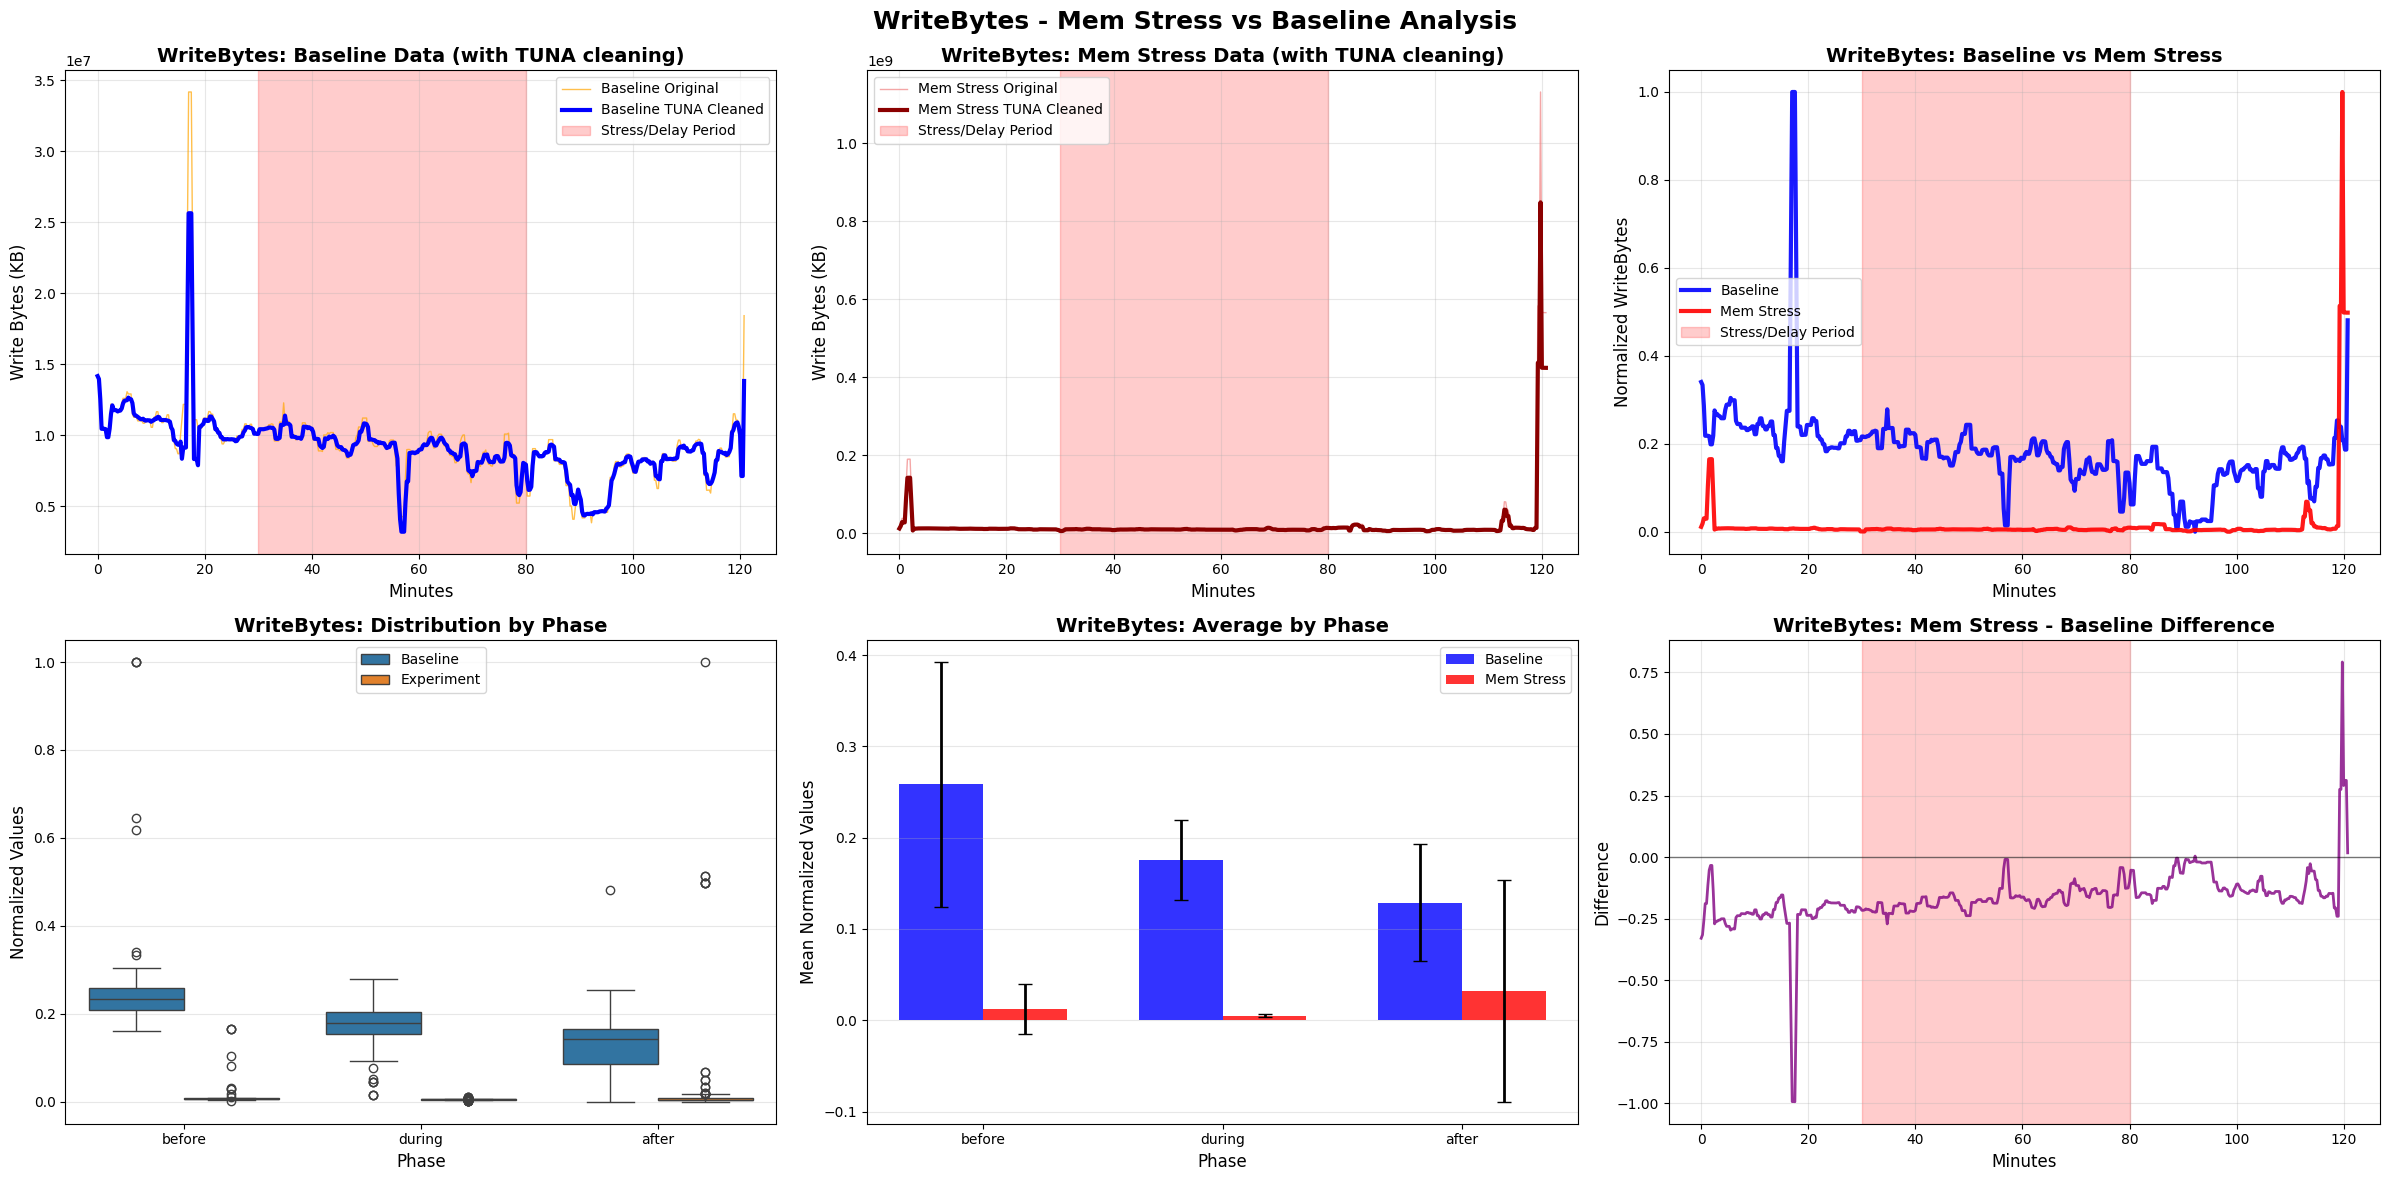


WRITEBYTES - MEM STRESS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  MEM STRESS: 46 outliers removed
    Noise Reduction: 25.4%, Correlation: 1.000
  BASELINE: 24 outliers removed
    Noise Reduction: 21.2%, Correlation: 0.954

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.1290  0.0643  0.0000  0.4808
before  0.2583  0.1341  0.1603  1.0000
during  0.1756  0.0435  0.0143  0.2784

MEM STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.0319  0.1212  0.0000  1.0000
before  0.0126  0.0272  0.0007  0.1650
during  0.0051  0.0014  0.0006  0.0098

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= 19.68, p=  0.0000 (SIGNIFICANT)
  DURING  : t= 55.53, p=  0.0000 (SIGNIFICANT)
  AFTER   : t=  9.03, p=  0.0000 (SIGNIFICANT)

MEM STRESS IMPACT:
  BEFORE  :  -95.12% (DECREASE)
  DURING  :  -97.08% (DECREASE)
  AFTER   :  -75.23% (DECREASE)

DISK I/O METRICS DETAILS:

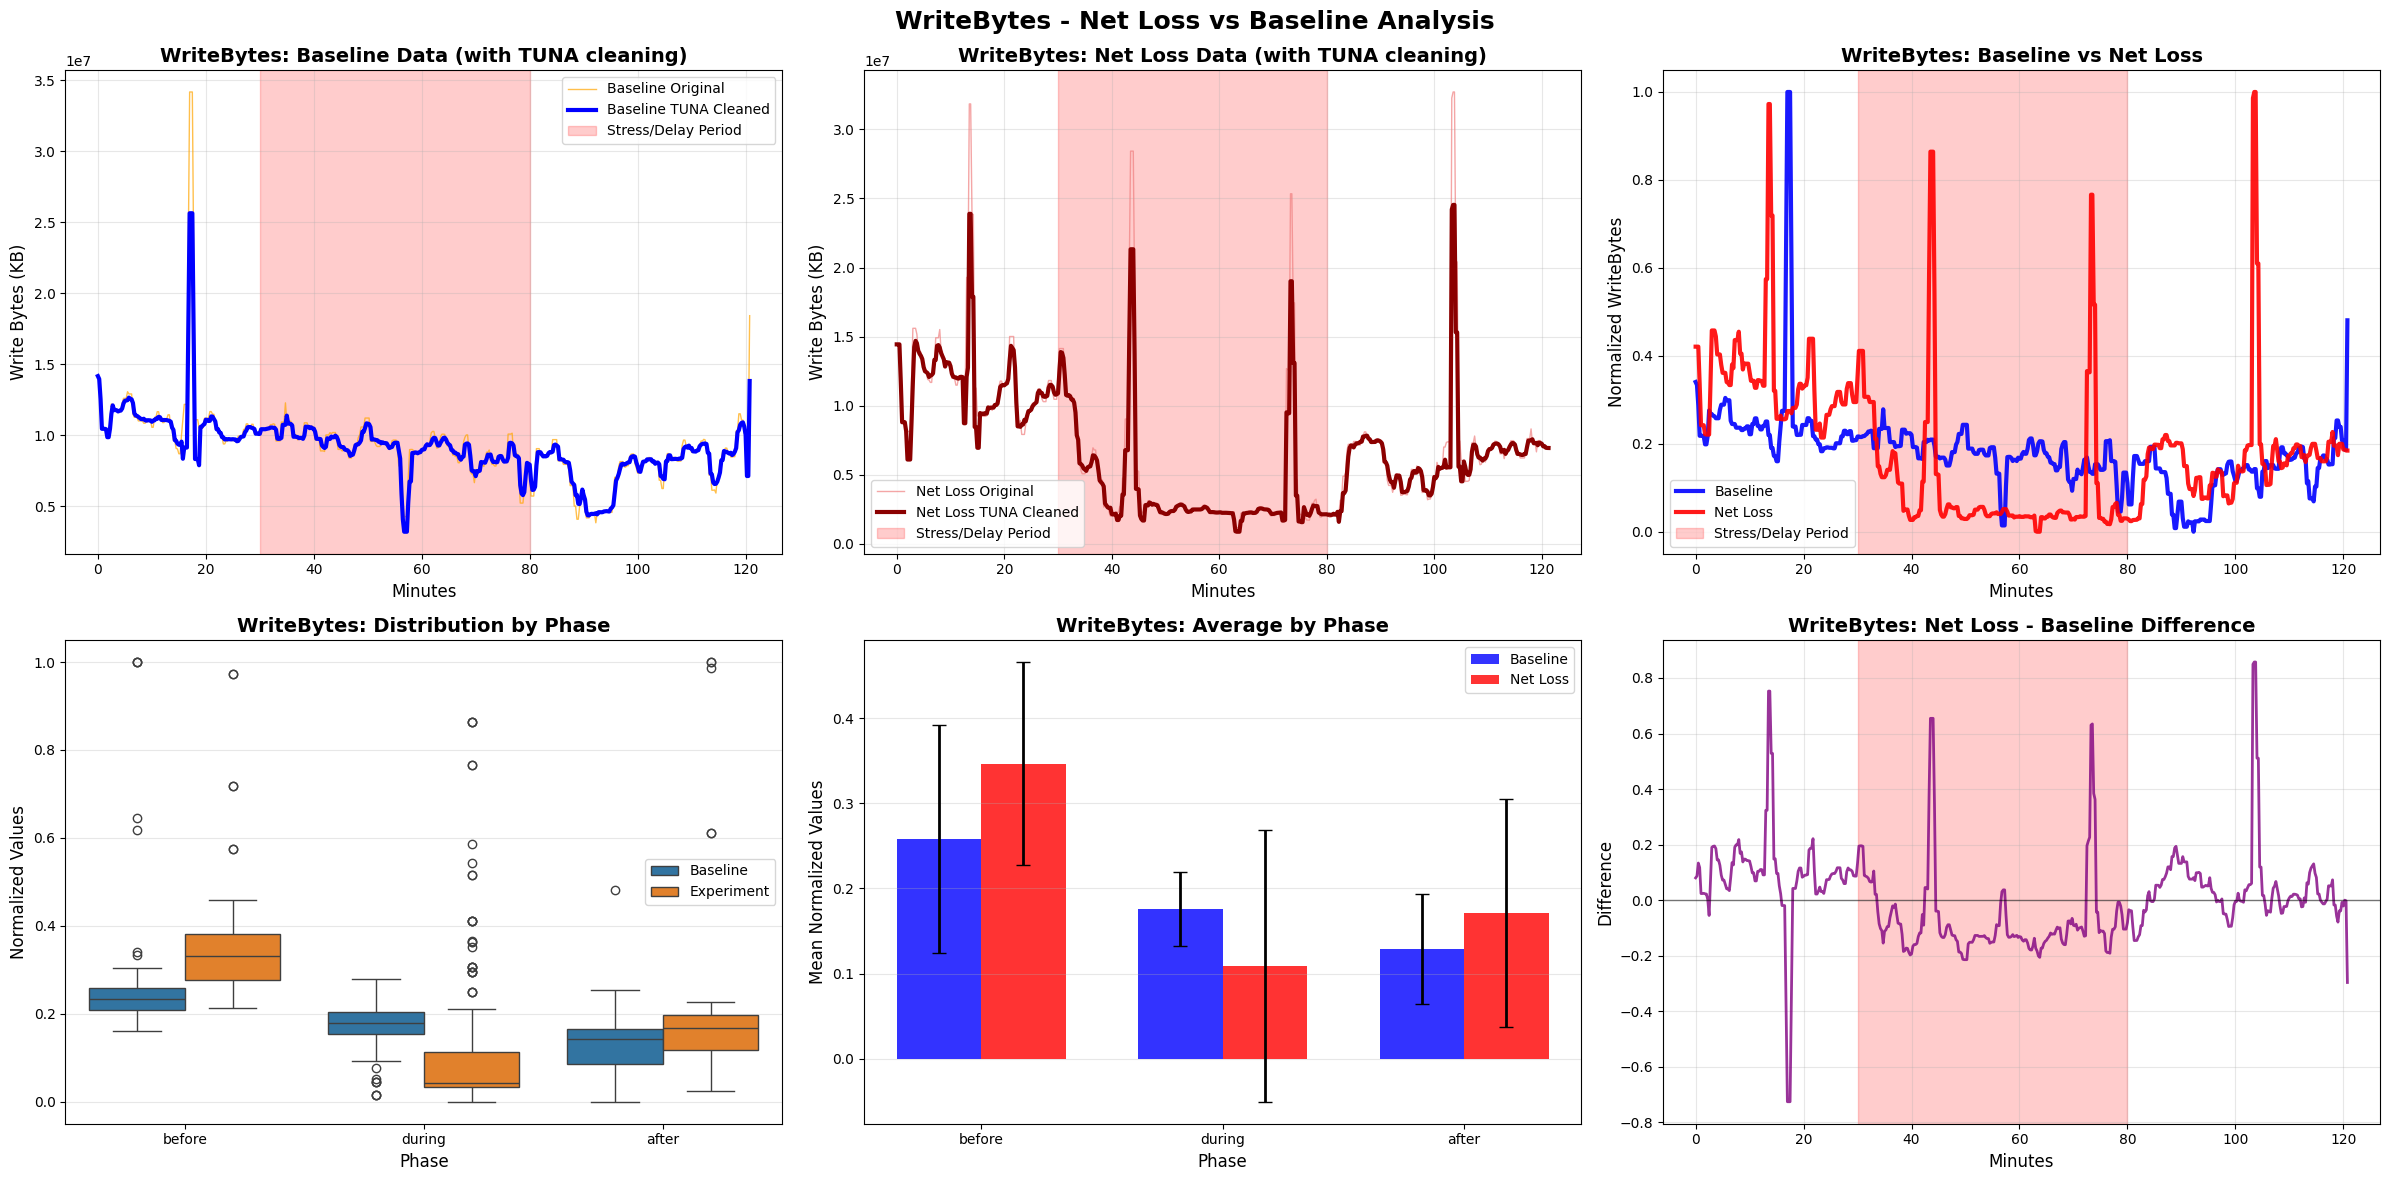


WRITEBYTES - NET LOSS VS BASELINE ANALYSIS

TUNA CLEANING SUMMARY:
  NET LOSS: 79 outliers removed
    Noise Reduction: 16.8%, Correlation: 0.974
  BASELINE: 24 outliers removed
    Noise Reduction: 21.2%, Correlation: 0.954

BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.1290  0.0643  0.0000  0.4808
before  0.2583  0.1341  0.1603  1.0000
during  0.1756  0.0435  0.0143  0.2784

NET LOSS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.1713  0.1343  0.0241  1.0000
before  0.3467  0.1196  0.2141  0.9726
during  0.1089  0.1597  0.0000  0.8643

STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t= -5.39, p=  0.0000 (SIGNIFICANT)
  DURING  : t=  5.71, p=  0.0000 (SIGNIFICANT)
  AFTER   : t= -3.63, p=  0.0003 (SIGNIFICANT)

NET LOSS IMPACT:
  BEFORE  :  +34.21% (INCREASE)
  DURING  :  -37.97% (DECREASE)
  AFTER   :  +32.86% (INCREASE)

DISK I/O METRICS DETAILS:
  Metri

In [ ]:
def calculate_disk_values(df, metric_name):
    """Calculate disk values - single column for BlockLatency, sum for ReadBytes/WriteBytes"""
    exclude_cols = ['Time', 'Minutes', 'source']
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if metric_name == 'BlockLatency':
        # For block latency, take the first device column
        return df[value_cols[0]].values
    else:
        # For ReadBytes/WriteBytes, sum across all partitions/devices
        return df[value_cols].sum(axis=1).values

def normalize_series(series):
    """Normalize a series to 0-1 range"""
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series(np.zeros(len(series)), index=series.index)

def get_y_axis_label(metric_name):
    """Get appropriate y-axis label based on metric name"""
    labels = {
        'BlockLatency': 'Block Latency (ms)',
        'ReadBytes': 'Read Bytes (KB)',
        'WriteBytes': 'Write Bytes (KB)',
        'DiskUtil': 'Disk Utilization (%)',
        'IOPS': 'I/O Operations per Second',
        'ThroughputRead': 'Read Throughput (MB/s)',
        'ThroughputWrite': 'Write Throughput (MB/s)'
    }
    return labels.get(metric_name, 'Disk I/O Value')

def analyze_and_plot_disk_comparison(metric_name, experiment_name, experiment_df, baseline_df, 
                                   tuna_results=None, delay_minutes=30, duration_minutes=50):
    """
    Create 6-plot comparison analysis for disk I/O metrics between experiment and baseline
    """
    
    # Calculate disk values
    experiment_values = calculate_disk_values(experiment_df, metric_name)
    baseline_values = calculate_disk_values(baseline_df, metric_name)
    
    # Create series with proper index
    experiment_series = pd.Series(experiment_values, index=experiment_df.index)
    baseline_series = pd.Series(baseline_values, index=baseline_df.index)
    
    # Get TUNA cleaned data if available
    experiment_cleaned = None
    baseline_cleaned = None
    if tuna_results and metric_name in tuna_results:
        if experiment_name in tuna_results[metric_name]:
            experiment_cleaned = pd.Series(tuna_results[metric_name][experiment_name]['cleaned'])
        if 'baseline' in tuna_results[metric_name]:
            baseline_cleaned = pd.Series(tuna_results[metric_name]['baseline']['cleaned'])
    
    # Normalize data
    experiment_norm = normalize_series(experiment_series)
    baseline_norm = normalize_series(baseline_series)
    
    # Create combined dataframe for analysis
    min_length = min(len(experiment_norm), len(baseline_norm), len(experiment_df['Minutes']), len(baseline_df['Minutes']))
    
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm.iloc[:min_length],
        'Experiment': experiment_norm.iloc[:min_length],
        'Minutes': experiment_df['Minutes'].iloc[:min_length],
        'Baseline_Minutes': baseline_df['Minutes'].iloc[:min_length]
    })
    
    df_combined['difference'] = df_combined['Experiment'] - df_combined['Baseline']
    
    # Add phase information
    df_combined['phase'] = 'before'
    df_combined.loc[(df_combined['Minutes'] >= delay_minutes) & 
                   (df_combined['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'
    df_combined.loc[df_combined['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after'
    
    # Statistical analysis by phase
    stats_baseline = df_combined.groupby('phase')['Baseline'].agg(['mean', 'std', 'min', 'max'])
    stats_experiment = df_combined.groupby('phase')['Experiment'].agg(['mean', 'std', 'min', 'max'])
    
    # T-tests for statistical significance
    t_tests = {}
    available_phases = stats_baseline.index.tolist()
    
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            data = df_combined[df_combined['phase'] == phase]
            if len(data) > 1:
                t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['Experiment'].dropna())
                t_tests[phase] = {'t': t_stat, 'p': p_value}
            else:
                t_tests[phase] = {'t': 0, 'p': 1}
        else:
            t_tests[phase] = {'t': 0, 'p': 1, 'note': 'Phase not present in data'}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        if phase in available_phases:
            baseline_mean = stats_baseline.loc[phase, 'mean']
            experiment_mean = stats_experiment.loc[phase, 'mean']
            if baseline_mean != 0:
                impact[phase] = ((experiment_mean - baseline_mean) / baseline_mean) * 100
            else:
                impact[phase] = 0
        else:
            impact[phase] = 0
    
    # Create the 6-plot visualization
    fig = plt.figure(figsize=(24, 12))
    
    # Get proper y-axis label
    y_label = get_y_axis_label(metric_name)
    
    # 1. Baseline with/without TUNA cleaning
    plt.subplot(2, 3, 1)
    plt.plot(baseline_df['Minutes'], baseline_series, 
             label='Baseline Original', color='orange', alpha=0.7, linewidth=1)
    
    if baseline_cleaned is not None:
        plt.plot(baseline_df['Minutes'].iloc[:len(baseline_cleaned)], baseline_cleaned, 
                 label='Baseline TUNA Cleaned', linewidth=3, color='blue')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(baseline_df['Minutes'], baseline_series, 
                 label='Baseline', linewidth=3, color='blue')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: Baseline Data{title_suffix}', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. Experiment with/without TUNA cleaning
    plt.subplot(2, 3, 2)
    plt.plot(experiment_df['Minutes'], experiment_series, 
             label=f'{experiment_name.replace("_", " ").title()} Original', 
             alpha=0.7, color='lightcoral', linewidth=1)
    
    if experiment_cleaned is not None:
        plt.plot(experiment_df['Minutes'].iloc[:len(experiment_cleaned)], experiment_cleaned, 
                 label=f'{experiment_name.replace("_", " ").title()} TUNA Cleaned', 
                 linewidth=3, color='darkred')
        title_suffix = " (with TUNA cleaning)"
    else:
        plt.plot(experiment_df['Minutes'], experiment_series, 
                 label=f'{experiment_name.replace("_", " ").title()}', 
                 linewidth=3, color='darkred')
        title_suffix = ""
    
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} Data{title_suffix}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison (normalized)
    plt.subplot(2, 3, 3)
    plt.plot(df_combined['Minutes'], df_combined['Baseline'], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(df_combined['Minutes'], df_combined['Experiment'], 
             label=f'{experiment_name.replace("_", " ").title()}', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="Stress/Delay Period")
    plt.title(f"{metric_name}: Baseline vs {experiment_name.replace('_', ' ').title()}", 
              fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {metric_name}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'Experiment', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{metric_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases_to_plot = [p for p in ['before', 'during', 'after'] if p in available_phases]
    
    if len(phases_to_plot) > 0:
        x = np.arange(len(phases_to_plot))
        width = 0.35
        
        baseline_means = [stats_baseline.loc[p, 'mean'] for p in phases_to_plot]
        baseline_stds = [stats_baseline.loc[p, 'std'] for p in phases_to_plot]
        experiment_means = [stats_experiment.loc[p, 'mean'] for p in phases_to_plot]
        experiment_stds = [stats_experiment.loc[p, 'std'] for p in phases_to_plot]
        
        bars1 = plt.bar(x - width/2, baseline_means, width, 
                       label='Baseline', alpha=0.8, color='blue')
        bars2 = plt.bar(x + width/2, experiment_means, width, 
                       label=f'{experiment_name.replace("_", " ").title()}', alpha=0.8, color='red')
        
        plt.errorbar(x - width/2, baseline_means, yerr=baseline_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        plt.errorbar(x + width/2, experiment_means, yerr=experiment_stds, 
                    fmt='none', ecolor='black', capsize=5, linewidth=2)
        
        plt.xticks(x, phases_to_plot)
    else:
        plt.text(0.5, 0.5, 'No phase data available', ha='center', va='center', transform=plt.gca().transAxes)
    
    plt.title(f'{metric_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{metric_name}: {experiment_name.replace("_", " ").title()} - Baseline Difference', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{metric_name} - {experiment_name.replace("_", " ").title()} vs Baseline Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{metric_name.upper()} - {experiment_name.upper().replace('_', ' ')} VS BASELINE ANALYSIS")
    print(f"{'='*80}")
    
    # Print TUNA cleaning summary if available
    if tuna_results and metric_name in tuna_results:
        print(f"\nTUNA CLEANING SUMMARY:")
        if experiment_name in tuna_results[metric_name]:
            exp_stats = tuna_results[metric_name][experiment_name]['stats']
            print(f"  {experiment_name.upper().replace('_', ' ')}: {exp_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {exp_stats['noise_reduction']:.1f}%, Correlation: {exp_stats['correlation']:.3f}")
        
        if 'baseline' in tuna_results[metric_name]:
            base_stats = tuna_results[metric_name]['baseline']['stats']
            print(f"  BASELINE: {base_stats['outliers']} outliers removed")
            print(f"    Noise Reduction: {base_stats['noise_reduction']:.1f}%, Correlation: {base_stats['correlation']:.3f}")

    print(f"\nBASELINE STATISTICS BY PHASE:")
    if len(stats_baseline) > 0:
        print(stats_baseline.round(4))
    else:
        print("  No phase data available")

    print(f"\n{experiment_name.upper().replace('_', ' ')} STATISTICS BY PHASE:")
    if len(stats_experiment) > 0:
        print(stats_experiment.round(4))
    else:
        print("  No phase data available")

    print(f"\nSTATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        if 'note' in test:
            print(f"  {phase.upper():8}: {test['note']}")
        else:
            sig = "SIGNIFICANT" if test['p'] < 0.05 else "NOT SIGNIFICANT"
            print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")

    print(f"\n{experiment_name.upper().replace('_', ' ')} IMPACT:")
    for phase, change in impact.items():
        if change == 0 and phase not in available_phases:
            print(f"  {phase.upper():8}: Phase not present in data")
        else:
            direction = "INCREASE" if change > 0 else "DECREASE" if change < 0 else "NO CHANGE"
            print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")

    # Print disk I/O metrics details
    value_cols = [col for col in experiment_df.columns if col not in ['Time', 'Minutes', 'source']]
    print(f"\nDISK I/O METRICS DETAILS:")
    print(f"  Metric: {metric_name}")
    print(f"  Metric type: {y_label}")
    print(f"  Columns analyzed: {value_cols}")
    print(f"  Data points analyzed: {len(df_combined)}")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_experiment': stats_experiment,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'tuna_info': {
            'experiment_cleaned': experiment_cleaned is not None,
            'baseline_cleaned': baseline_cleaned is not None
        }
    }

def run_comprehensive_disk_analysis(all_datasets, tuna_results=None):
    """
    Run comprehensive disk I/O analysis for all metrics against their baselines
    """
    print(f"\n{'='*80}")
    print("COMPREHENSIVE DISK I/O ANALYSIS")
    print(f"{'='*80}")
    print("Each disk metric will be compared to its own baseline")
    
    analysis_results = {}
    
    for metric_name, experiments in all_datasets.items():
        print(f"\n🔍 Analyzing {metric_name}...")
        analysis_results[metric_name] = {}
        
        baseline_df = experiments['baseline']
        
        for experiment_name, experiment_df in experiments.items():
            if experiment_name != 'baseline':
                print(f"\n📊 Comparing {metric_name}: {experiment_name} stress vs baseline")
                
                result = analyze_and_plot_disk_comparison(
                    metric_name=metric_name,
                    experiment_name=experiment_name,
                    experiment_df=experiment_df,
                    baseline_df=baseline_df,
                    tuna_results=tuna_results
                )
                
                analysis_results[metric_name][experiment_name] = result
    
    return analysis_results

# Run comprehensive analysis using existing tuna_results from previous cell
disk_results = run_comprehensive_disk_analysis(all_datasets, tuna_results)

# Or analyze a specific disk metric:
# specific_result = analyze_and_plot_disk_comparison(
#     metric_name='BlockLatency',
#     experiment_name='cpu_stress',
#     experiment_df=all_datasets['BlockLatency']['cpu_stress'],
#     baseline_df=all_datasets['BlockLatency']['baseline'],
#     tuna_results=tuna_results
# )